# A Network of Thrones - Season 3

**Marco Uderzo, ID 2096998**


marco.uderzo@studenti.unipd.it

In [1]:
!pip install igraph
!pip install cairocffi
!pip install scikit-network
!pip install networkx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 33.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 35.0 MB/s eta 0:00:00


In [2]:
import pandas as pd
import itertools
import networkx as nx
import igraph as ig
import ast
import cairocffi as cairo
import random
import math
import json
import numpy as np
import matplotlib.pyplot as plt
from sknetwork.clustering import get_modularity

In [3]:
from google.colab import drive
drive.mount('/content/drive')
folder = 'drive/MyDrive/NetworkScience/'

Mounted at /content/drive


In [4]:
relations_df = pd.read_csv(folder+"data/got-s3-edges.csv")
characters_df  = pd.read_csv(folder+"data/got-s3-nodes.csv")

In [5]:
# Delete self-loops - there are no self-loops in the data.

#self_loop = []
#for i in range(len(relations)):
#  if relations["Source"][i] == relations["Target"][i]:
#    self_loop.append(i)
#
#
#relations = relations.drop(set(self_loop)).reset_index()

In [6]:
import networkx as nx

# Check for duplicate Ids
duplicates = characters_df[characters_df.duplicated('Id', keep=False)]
if not duplicates.empty:
    print("Duplicate Ids found in characters_df:")
    print(duplicates)

# Remove duplicates based on Id (keeping the first occurrence)
characters_df = characters_df.drop_duplicates(subset='Id')

# Create the NetworkX graph from the edge list
G = nx.from_pandas_edgelist(relations_df, 'Source', 'Target', ['Weight'])

# Convert characters DataFrame to dictionary and add nodes with attributes
characters = characters_df.set_index('Id').to_dict('index')

G.add_nodes_from(characters.items())
print(G.nodes(data=True))
print(G.edges(data=True))


Duplicate Ids found in characters_df:
               Id          Label
56  LORD_OF_BONES  Lord of Bones
91  LORD_OF_BONES  Lord of Bones
[('JON', {'Label': 'Jon'}), ('YGRITTE', {'Label': 'Ygritte'}), ('BRIENNE', {'Label': 'Brienne'}), ('JAIME', {'Label': 'Jaime'}), ('TYRION', {'Label': 'Tyrion'}), ('TYWIN', {'Label': 'Tywin'}), ('RAMSAY', {'Label': 'Ramsay'}), ('THEON', {'Label': 'Theon'}), ('CERSEI', {'Label': 'Cersei'}), ('GILLY', {'Label': 'Gilly'}), ('SAM', {'Label': 'Sam'}), ('ROBB', {'Label': 'Robb'}), ('TALISA', {'Label': 'Talisa'}), ('SANSA', {'Label': 'Sansa'}), ('ARYA', {'Label': 'Arya'}), ('HOUND', {'Label': 'Sandor'}), ('DAVOS', {'Label': 'Davos'}), ('STANNIS', {'Label': 'Stannis'}), ('SHAE', {'Label': 'Shae'}), ('BRONN', {'Label': 'Bronn'}), ('DAENERYS', {'Label': 'Daenerys'}), ('JORAH', {'Label': 'Jorah'}), ('BRAN', {'Label': 'Bran'}), ('OSHA', {'Label': 'Osha'}), ('MISSANDEI', {'Label': 'Missandei'}), ('JOJEN', {'Label': 'Jojen'}), ('JOFFREY', {'Label': 'Joffrey'}), ('MA

In [ ]:
g = ig.Graph.from_networkx(G)

# Generate the spring layout using NetworkX
spring_layout = nx.spring_layout(G)

# Prepare colors for the nodes
node_colors = ["LightGreen" for _ in range(len(G.nodes()))]

# Apply PageRank
pagerank_scores = g.pagerank(weights='Weight')
pagerank_scores = np.array(pagerank_scores)
pagerank_scores_log = np.log1p(pagerank_scores)

# Set the node sizes based on PageRank
min_size = 20  # Minimum node size
max_size = 200  # Maximum node size
size_range = max_size - min_size
node_sizes = min_size + size_range * (pagerank_scores_log - np.min(pagerank_scores_log)) / (np.max(pagerank_scores_log) - np.min(pagerank_scores_log))

# Add positions to igraph nodes
positions = spring_layout
g.vs["x"] = [positions[node][0] for node in G.nodes()]
g.vs["y"] = [positions[node][1] for node in G.nodes()]
g.vs["pagerank"] = pagerank_scores

# Plot the graph with igraph
fig, ax = plt.subplots(figsize=(45, 45))
ax.set_xlim(min(g.vs["x"])-0.05, max(g.vs["x"])+0.05)
ax.set_ylim(min(g.vs["y"])-0.05, max(g.vs["y"])+0.05)
ax.set_xticks([])
ax.set_yticks([])
ax.set_aspect('equal')
fig.subplots_adjust(left=0, right=1, top=1, bottom=0)

ig.plot(
    g,
    target=ax,
    layout=[(pos[0], pos[1]) for pos in positions.values()],
    vertex_color=node_colors,
    vertex_size=node_sizes,
    vertex_label=g.vs["Label"] if "Label" in g.vs.attributes() else None,
    vertex_label_size=20,
    edge_color="grey",
    edge_width=0.5
)

plt.show()



Let's list the various characters

In [ ]:
for nm in g.vs():
  print(nm['Label'])

### Size

In [ ]:
nodes = g.vs()
edges = g.es()

print("Number of possible edges (N*(N-1)):", int(len(nodes)*(len(nodes)-1)/2))
print("Number of nodes (Graph Order):", len(nodes))
print("Number of edges (Graph Size):", len(edges))

# Graph Density: how connected are the nodes. Calculated by: n_edges/n_possible_edges
print("Graph Density:", g.density())

### Distribution

In [ ]:
#Generate an appropriate ensemble of null-model networks, such as Erdős–Rényi random graphs, or Maslov–Sneppen random graphs.
rand_net = nx.erdos_renyi_graph(len(G.nodes()), len(G.edges())/(len(G.nodes())*(len(G.nodes()) - 1)/2), seed=None, directed=False)
nx.draw(rand_net)

In [ ]:
#Calculate the average of the mean shortest path length Lr over this ensemble of null-model networks; calculate Cr analogously.
print("number of nodes in random net:", len(rand_net.nodes()), "number of edges in random net", len(rand_net.edges()))
print("average shortest path for the random network", nx.average_shortest_path_length(rand_net))
print("clustering coefficient for the random network", nx.average_clustering(rand_net))

In [ ]:
if nx.is_connected(G):
    avg_shortest_path = nx.average_shortest_path_length(G)
else:
    # Extract the largest connected component
    largest_cc = max(nx.connected_components(G), key=len)
    subgraph = G.subgraph(largest_cc)
    avg_shortest_path = nx.average_shortest_path_length(subgraph)


# Calculate the normalised shortest path λ:=L/Lr. and γ:=C/Cr
print("normalised average shortest path for the original network", avg_shortest_path / nx.average_shortest_path_length(rand_net))
print("normalised clustering coefficient for the original network", nx.average_clustering(G) / nx.average_clustering(rand_net))


The idea is that:
- Small-world networks should have some spatial structure, which is reflected by a high clustering coefficient.
By contrast, random networks have no such structure and a low clustering coefficient.
- Small-world networks are efficient in communicating and similar and thus have a small shortest path length,
comparable to that of random networks. By contrast, purely spatial networks have a high shortest path length.

In [ ]:
# Calculate the normalised shortest path λ:=L/Lr. and γ:=C/Cr
lambda_val = avg_shortest_path / nx.average_shortest_path_length(rand_net)
gamma_val = nx.average_clustering(G) / nx.average_clustering(rand_net)

# Check small-world criteria
if lambda_val >= 1 and gamma_val > 1:
    print("This network is a small-world network")
    print(f"Lambda value: {lambda_val}, Gamma value: {gamma_val}")
else:
    print("This network is not a small-world network")
    print(f"Lambda value: {lambda_val}, Gamma value: {gamma_val}")


In [ ]:
# Using nx.sigma() and nx.omega() to further validate that the graph is indeed of small-world type

#sigma = nx.sigma(G, niter=5, nrand=10, seed=None)
#if sigma > 1:
#  print("Small-world: The value of sigma is", sigma) # yes
#
#
#omega = nx.omega(G, niter=5, nrand=10, seed=None)
#
#if omega < 0.3 and omega > -0.3:
#  print("Small-world: The value of omega is",  omega) # yes

### Connectedness

In [ ]:
if(g.is_connected()):
  print("Graph is connected")
else:
  print("Graph is not connected")

### Diameter

The diameter is the highest distance in the network

In [ ]:
print("Graph Diameter:", g.diameter(directed=False))

In [ ]:
import networkx as nx
import igraph as ig

# Calculate the diameter path using igraph
d = g.get_diameter()

# GET NODES IN THE DIAMETER PATH
diameter_path = d

# GET EDGES IN THE DIAMETER PATH
diameter_edges = g.get_eids(pairs=[(d[i], d[i+1]) for i in range(len(d)-1)], directed=False)

# Visual style for plotting
visual_style = {
    "vertex_color": ["red" if node.index in diameter_path else "white" for node in g.vs],
    "edge_color": ["red" if edge.index in diameter_edges else "grey" for edge in g.es],
    "edge_width": [2 if edge.index in diameter_edges else 0.1 for edge in g.es],
    "vertex_label": [node["Label"] for node in g.vs],
    "vertex_size": [10 if node.index in diameter_path else 2 for node in g.vs],
    "vertex_label_size": [10 if node.index in diameter_path else 2 for node in g.vs]

}

print("Path between most distant nodes:", [g.vs[index]["Label"] for index in diameter_path])



# Plot the graph
ig.plot(g, **visual_style)


### Shortest Paths

In [ ]:
# SHORTEST PATHS
shortest_paths = {}
for node in nodes:
    shortest_paths[node["Label"]]=[nodes[v]["Label"] for v in g.get_all_shortest_paths(node)
                                                    ]
# SHOW DISTANCES OF SHORTEST PATHS BETWEEN ONE NODE AND EVERYBODY ELSE

node_name = "Daenerys"
print("Shortest paths between", node_name,"and other nodes", shortest_paths[node_name])

distances = [len(path) for path in shortest_paths[node_name]]

visual_style["vertex_color"] = ["pink" if node["Label"]==node_name else "grey" for node in nodes]
visual_style["edge_color"] = "darkgrey"

visual_style["vertex_label"] = distances

ig.plot(g, **visual_style)

In [ ]:
sp = dict(nx.shortest_path(G)) #between all nodes
print(sp)

In [ ]:
i = 0
for _, v in sp.items():
  for char, dic in v.items():
    if len(dic) == len(diameter_path):
      i = i+1

print("The number of the shortest path long as the diameter are", i)

In [ ]:
# AVERAGE PATH LENGTH - HOW CLOSE ARE THE NODES TO EACH OTHER ON AVERAGE
print("Average path length:", g.average_path_length(directed=False))

# Check if G is connected (for NetworkX)
if nx.is_connected(G):
    avg_shortest_path = nx.average_shortest_path_length(G)
else:
    # Extract the largest connected component
    largest_cc = max(nx.connected_components(G), key=len)
    subgraph = G.subgraph(largest_cc)
    avg_shortest_path = nx.average_shortest_path_length(subgraph)

print("Average shortest path length:", avg_shortest_path)

### Node Degrees

In [ ]:
# CONNECTIVITY - HOW WELL CONNECTED A NODE IS

def sum_neigh_degree(graph): # compute the sum of neighbors' degrees
    data = {}
    for node in graph.vs:
        neighbors = graph.neighbors(node, mode="all")
        neighbors_degrees = [graph.degree(neigh) for neigh in neighbors]
        data[node.index] = sum(neighbors_degrees) / len(neighbors_degrees) if neighbors_degrees else 0
    return data


print("Node degrees:"),

# Compute the average degree of each node’s neighbors
sum_neigh_degree = sum_neigh_degree(g)

# Prepare data for DataFrame
degree = [v.degree() for v in g.vs]
average_neigh_degree = [sum_neigh_degree[v.index] for v in g.vs]

degree_df = pd.DataFrame({
    'Node': g.vs["Label"],
    'Degree': degree,
    "Average degree of node's neighbours": average_neigh_degree
})

degree_df = degree_df.sort_values(by=['Degree'], ascending=False)

# Print results
print("First 10 nodes with highest degree")
print(degree_df.head(10))
print("\n")
print("Last 5 nodes with lowest degree")
print(degree_df.tail(5))



In [ ]:
dmax = max(degree_df['Degree'])
print(f'maximum degree: {dmax}')
dmin = min(degree_df['Degree'])
print(f'minimum degree: {dmin}')
davg = np.mean(degree_df['Degree'])
print(f'average degree: {davg}')
dmostfreq = list(dict(degree_df['Degree'].value_counts()).items())[0]
print(f'most frequent degree (mode): {dmostfreq[0]} with {dmostfreq[1]} nodes')

In [ ]:
#SET SIZE PROP TO DEGREE
visual_style["vertex_size"] = [4*degree if degree>3 else 20 for degree in g.degree()]

#COLOR NEAREST NEIGHBORS OF A CERTAIN NODE
node_name = "Jon"
for node in nodes:
    if node["Label"] == node_name:
        node_index = node.index

neighbors = g.neighborhood(nodes[node_index],order=1)
visual_style["vertex_color"] = ["fuchsia" if node.index in neighbors else "grey" for node in nodes]
visual_style["edge_color"] = "darkgrey"

ig.plot(g, **visual_style)

In [ ]:
from matplotlib.ticker import ScalarFormatter


fig = plt.figure("Degree ", figsize=(8, 8))

axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[3:, :2])
# Plot the line in orange
ax0.plot(sorted(degree_df['Degree'], reverse=True), "orange")
# Plot the dots in blue
ax0.plot(sorted(degree_df['Degree'], reverse=True), "bo", markersize=3)
ax0.set_title("Degree Rank Plot")
ax0.set_ylabel("Degree (log)")
ax0.set_xlabel("Rank (log)")
ax0.set_xscale('log')
ax0.set_yscale('log')

ax0.xaxis.set_major_formatter(ScalarFormatter())
ax0.yaxis.set_major_formatter(ScalarFormatter())

ax1 = fig.add_subplot(axgrid[3:, 2:])
unique, counts = np.unique(degree_df['Degree'], return_counts=True)
ax1.bar(unique, counts)
ax1.set_title("Degree histogram")
ax1.set_xlabel("Degree")
ax1.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()


In [ ]:
visual_style["vertex_size"] = [degree if degree>10 else 8 for degree in g.degree()]
visual_style['edge_color'] = 'black'
visual_style['vertex_color'] = 'red'
ig.plot(g, **visual_style)

### Bridges

An edge is a bridge if its removal increases the number of (weakly) connected components in the graph.

In [ ]:
bridges = g.bridges()

if bridges:
    print("The network has bridges.")
    bridge_labels = [(g.vs[g.es[bridge].source]["Label"], g.vs[g.es[bridge].target]["Label"]) for bridge in bridges]
    print("The bridges are:", bridge_labels)
else:
    print("The network doesn't have any bridges")

print("Number of bridges:", len(bridges))

In [ ]:
visual_style = {}

bridges_index = g.bridges()

visual_style["vertex_color"] = 'grey'
visual_style["edge_color"] = ["red" if edge.index in bridges_index else "grey" for edge in edges]
#visual_style["vertex_label"] = [g.vs[edge.source]["Label"] for edge in edges]
visual_style["edge_width"] = [2 if edge.index in bridges_index else 0.1 for edge in edges]
#visual_style["vertex_label_size"] = [10 if edge.index in bridges_index else 2 for edge in edges]

ig.plot(g, **visual_style)

### Giant Components



In [ ]:
clusters = g.connected_components()
clusters = sorted(clusters, key=len, reverse=True)

# Get the largest connected component
largest_cc = clusters[0]
G0 = g.subgraph(largest_cc)

# Check if the original graph is isomorphic to the largest connected component
if g.isomorphic(G0):
    print("This network is connected and there are no isolated nodes")
else:
    print("This network has", len(clusters), "components")

### Centrality

In [ ]:
# PageRank Centrality
pr_cen = nx.pagerank(G)
# Closeness centrality
clo_cen = nx.closeness_centrality(G)
# Betweenness centrality
bet_cen = nx.betweenness_centrality(G)
# Eigenvector centrality
eig_cen = nx.eigenvector_centrality(G)
# Harmonic centrality
har_cen = nx.harmonic_centrality(G)
# degree centrality
degree_cen = nx.degree_centrality(G)

centrality_df = pd.DataFrame(data = list(zip(bet_cen.keys(), bet_cen.values(), clo_cen.values(), eig_cen.values(), [1/x for x in list(har_cen.values())], degree_cen.values())),
                             columns = ['Node','Betweenness centrality', 'Closeness centrality', 'Eigenvector centrality', 'Harmonic centrality', 'Degree centrality'])
centrality_df

In [ ]:
print("Mean values of Centralities:")
print("PageRank:", np.mean(list(pr_cen.values())))
print("Betweenness:", np.mean(list(bet_cen.values())))
print("Closeness:", np.mean(list(clo_cen.values())))
print("Eigenvector:", np.mean(list(eig_cen.values())))
print("Harmonic:", 1/np.mean(list(har_cen.values())))
print("Degree:", np.mean(list(degree_cen.values())))

In [ ]:
def highest_centrality(centrality_dict):
  # Create ordered tuple of centrality data
  cent_items=[(b,a) for (a,b) in centrality_dict.items()]
  # Sort in descending order
  cent_items.sort()
  cent_items.reverse()
  return tuple(reversed(cent_items[0]))

def k_highest_centrality(centrality_dict, k):
  # Create ordered tuple of centrality data
  cent_items=[(b,a) for (a,b) in centrality_dict.items()]
  # Sort in descending order
  cent_items.sort()
  cent_items.reverse()
  return tuple(cent_items[0:k])

In [ ]:
# PageRank centrality
highest_centrality_pr_cen = highest_centrality(pr_cen)
# Closeness centrality
highest_centrality_clo_cen = highest_centrality(clo_cen)
# Betweenness centrality
highest_centrality_bet_cen = highest_centrality(bet_cen)
# Eigenvector centrality
highest_centrality_eig_cen = highest_centrality(eig_cen)
# Harmonic centrality
highest_centrality_har_cen = highest_centrality(har_cen)
# degree centrality
highest_centrality_degree_cen = highest_centrality(degree_cen)

central_char = []
central_score =  []

central_char.extend([highest_centrality_clo_cen[0], highest_centrality_bet_cen[0], highest_centrality_eig_cen[0], highest_centrality_har_cen[0], highest_centrality_degree_cen[0]])
central_score.extend([highest_centrality_clo_cen[1], highest_centrality_bet_cen[1], highest_centrality_eig_cen[1], 1/highest_centrality_har_cen[1], highest_centrality_degree_cen[1]])

centrality_df = pd.DataFrame(data = list(zip(central_char, central_score)), columns = ['Most central character', 'Score'])
centrality_df

In [ ]:
def createCol(cen):
  central_char = []
  central_score =  []
  for i in range(len(cen)):
    central_char.append(cen[i][1])
    central_score.append(cen[i][0])
  return list(central_char), list(central_score)

#5 most central character

highest_centrality_pr_cen = k_highest_centrality(pr_cen, 5)
pr_cen_char, pr_cen_scores = createCol(highest_centrality_pr_cen)

highest_centrality_clo_cen = k_highest_centrality(clo_cen, 5)
clo_cen_char, clo_cen_scores = createCol(highest_centrality_clo_cen)

highest_centrality_bet_cen = k_highest_centrality(bet_cen, 5)
bet_cen_char, bet_cen_scores = createCol(highest_centrality_bet_cen)

highest_centrality_eig_cen = k_highest_centrality(eig_cen, 5)
eig_cen_char, eig_cen_scores = createCol(highest_centrality_eig_cen)

highest_centrality_har_cen = k_highest_centrality(har_cen, 5)
har_cen_char, har_cen_scores = createCol(highest_centrality_har_cen)

highest_centrality_degree_cen = k_highest_centrality(degree_cen, 5)
degree_cen_char, degree_cen_scores = createCol(highest_centrality_degree_cen)

centrality_df = pd.DataFrame(data = list(zip(bet_cen_char, bet_cen_scores, clo_cen_char, clo_cen_scores, eig_cen_char, eig_cen_scores, har_cen_char, [1/x for x in har_cen_scores], degree_cen_char, degree_cen_scores)),
                             columns = ['Most central character - Betweenness ', 'Score - Betweenness', 'Most central character - Closeness ', 'Score - Closeness ', 'Most central character - Eigenvector ', 'Score - Eigenvector ',
                             'Most central character - Harmonic ', 'Score - Harmonic ', 'Most central character - Degree ', 'Score - Degree '])
centrality_df

### Homophily

In [ ]:
#Compute degree assortativity of graph.
#Assortativity measures the similarity of connections in the graph with respect to the node degree.
#This is the same as degree_assortativity_coefficient but uses the potentially faster scipy.stats.pearsonr function.
assortativity_coefficient = nx.degree_assortativity_coefficient(G, weight="Weight")
print("Degree assortativity coefficient:",nx.degree_pearson_correlation_coefficient(G,weight="Weight"))

In [ ]:
#jaccard similarity between all couples of nodes
preds = nx.jaccard_coefficient(G, G.edges())

first_node = []
sec_node = []
score = []

for u, v, p in preds:
  first_node.append(u)
  sec_node.append(v)
  score.append(p)

jaccard_coefficient = pd.DataFrame(data = list(zip(first_node, sec_node, score)),
                             columns = ['First node', 'Second node', 'Score'])

jaccard_coefficient = jaccard_coefficient.sort_values("Score", ascending=False)
jaccard_coefficient

### Triangles

In [ ]:
#list of all traingles
triangles_list = [(n,nbr,nbr2) for n in G for nbr, nbr2 in itertools.combinations(G[n],2) if nbr in G[nbr2]]
print("List of all the edges involved in the traingles")
triangles_list[:30]

In [ ]:
#number of triangles per character, sorted by value in descendent order

triangles_frequency = pd.DataFrame(data = list(zip(nx.triangles(G).keys(), nx.triangles(G).values())),
                             columns = ['Character', '# of triangles in which they are involved'])

triangles_frequency = triangles_frequency.sort_values("# of triangles in which they are involved", ascending=False)
triangles_frequency.head(10)

In [ ]:
#total number of triangles
print("There are", int(np.sum(list(nx.triangles(G).values())) / 3), "triangles")

Investigating interesting character triangles

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import igraph as ig

# Compute positions using spring layout
community_graph_layout_gn = nx.spring_layout(G)

# Define default color for nodes and edges
default_node_color = "lightgrey"
default_edge_color = "grey"

# Initialize node colors and sizes
node_colors = [default_node_color] * len(G.nodes())
node_sizes = [70] * len(G.nodes())

# Initialize edge colors and widths
edge_colors = [default_edge_color] * len(G.edges())
edge_widths = [1] * len(G.edges())

# Convert edges to sets for efficient lookup
edges_set = set(map(frozenset, G.edges()))

# Function to compute the strength of a triangle and the maximum edge weight
def compute_triangle_strength_and_max_edge(triangle, graph):
    nodes = list(triangle)
    strength = 0
    max_edge_weight = 0
    max_edge = None
    for i in range(3):
        for j in range(i + 1, 3):
            edge = (nodes[i], nodes[j]) if (nodes[i], nodes[j]) in graph.edges() else (nodes[j], nodes[i])
            if edge in graph.edges():
                edge_weight = graph[edge[0]][edge[1]]['Weight']
                strength += edge_weight
                if edge_weight > max_edge_weight:
                    max_edge_weight = edge_weight
                    max_edge = edge
    return strength, max_edge_weight, max_edge

# Find all triangles in the graph
triangles = [list(triangle) for triangle in nx.enumerate_all_cliques(G) if len(triangle) == 3]

# Compute the strengths and max edge weights of all triangles
triangle_strengths_and_max_edges = []
for triangle in triangles:
    strength, max_edge_weight, max_edge = compute_triangle_strength_and_max_edge(triangle, G)
    triangle_strengths_and_max_edges.append((triangle, strength, max_edge_weight, max_edge))

# Sort triangles by strength in descending order and select the top 10
top_triangles = sorted(triangle_strengths_and_max_edges, key=lambda x: x[1], reverse=True)[:30]

# Highlight the nodes and edges in the top 10 triangles
for triangle, strength, max_edge_weight, max_edge in top_triangles:
    color = "Crimson"  # Use a single color for all top triangles or set a different color if needed
    for node in triangle:
        if node in G.nodes():
            node_index = list(G.nodes()).index(node)
            node_colors[node_index] = color  # Node color based on triangle color
            node_sizes[node_index] = 100  # Larger size for highlighted nodes

    for i in range(3):
        for j in range(i + 1, 3):
            edge = (triangle[i], triangle[j]) if (triangle[i], triangle[j]) in G.edges() else (triangle[j], triangle[i])
            if edge in G.edges():
                edge_index = list(G.edges()).index(edge)
                edge_colors[edge_index] = color  # Edge color based on triangle color
                edge_widths[edge_index] = 5  # Thicker edge for edges in triangles

# Print the strengths of the top 10 triangles, the highest edge weights, and the names of the edges
for triangle, strength, max_edge_weight, max_edge in top_triangles:
    print(f"Triangle {triangle} has strength {strength}, the highest edge strength is {max_edge_weight}, and the strongest edge is {max_edge}")

# Add positions to igraph nodes
positions = community_graph_layout_gn
g.vs["x"] = [positions[node][0] for node in G.nodes()]
g.vs["y"] = [positions[node][1] for node in G.nodes()]

# Plot the graph with igraph
fig, ax = plt.subplots(figsize=(45, 45))
ax.set_xlim(min(g.vs["x"]) - 0.05, max(g.vs["x"]) + 0.05)
ax.set_ylim(min(g.vs["y"]) - 0.05, max(g.vs["y"]) + 0.05)
ax.set_xticks([])
ax.set_yticks([])
ax.set_aspect('equal')
fig.subplots_adjust(left=0, right=1, top=1, bottom=0)

# Plot the graph with igraph
ig.plot(
    g,
    target=ax,
    layout=[(pos[0], pos[1]) for pos in positions.values()],
    vertex_color=node_colors,
    vertex_size=node_sizes,
    vertex_label=g.vs["Label"],
    vertex_label_size=30,
    edge_color=edge_colors,
    edge_width=edge_widths
)

plt.show()


Triangle ('JON', 'YGRITTE', 'TORMUND') has strength 222, the highest edge strength is 159, and the strongest edge is ('JON', 'YGRITTE')
Triangle ('TYRION', 'TYWIN', 'SANSA') has strength 211, the highest edge strength is 115, and the strongest edge is ('TYRION', 'TYWIN')
Triangle ('BRIENNE', 'JAIME', 'LOCKE') has strength 201, the highest edge strength is 127, and the strongest edge is ('BRIENNE', 'JAIME')
Triangle ('TYRION', 'TYWIN', 'SANSA') has strength 211, the highest edge strength is 115, and the strongest edge is ('TYRION', 'TYWIN')
Triangle ('TYRION', 'CERSEI', 'JOFFREY') has strength 176, the highest edge strength is 95, and the strongest edge is ('TYRION', 'CERSEI')
Triangle ('ROBB', 'TALISA', 'CATELYN') has strength 174, the highest edge strength is 89, and the strongest edge is ('ROBB', 'TALISA')
Triangle ('BRIENNE', 'JAIME', 'ROOSE_BOLTON') has strength 165, the highest edge strength is 127, and the strongest edge is ('BRIENNE', 'JAIME')
Triangle ('DAENERYS', 'JORAH', 'BAR

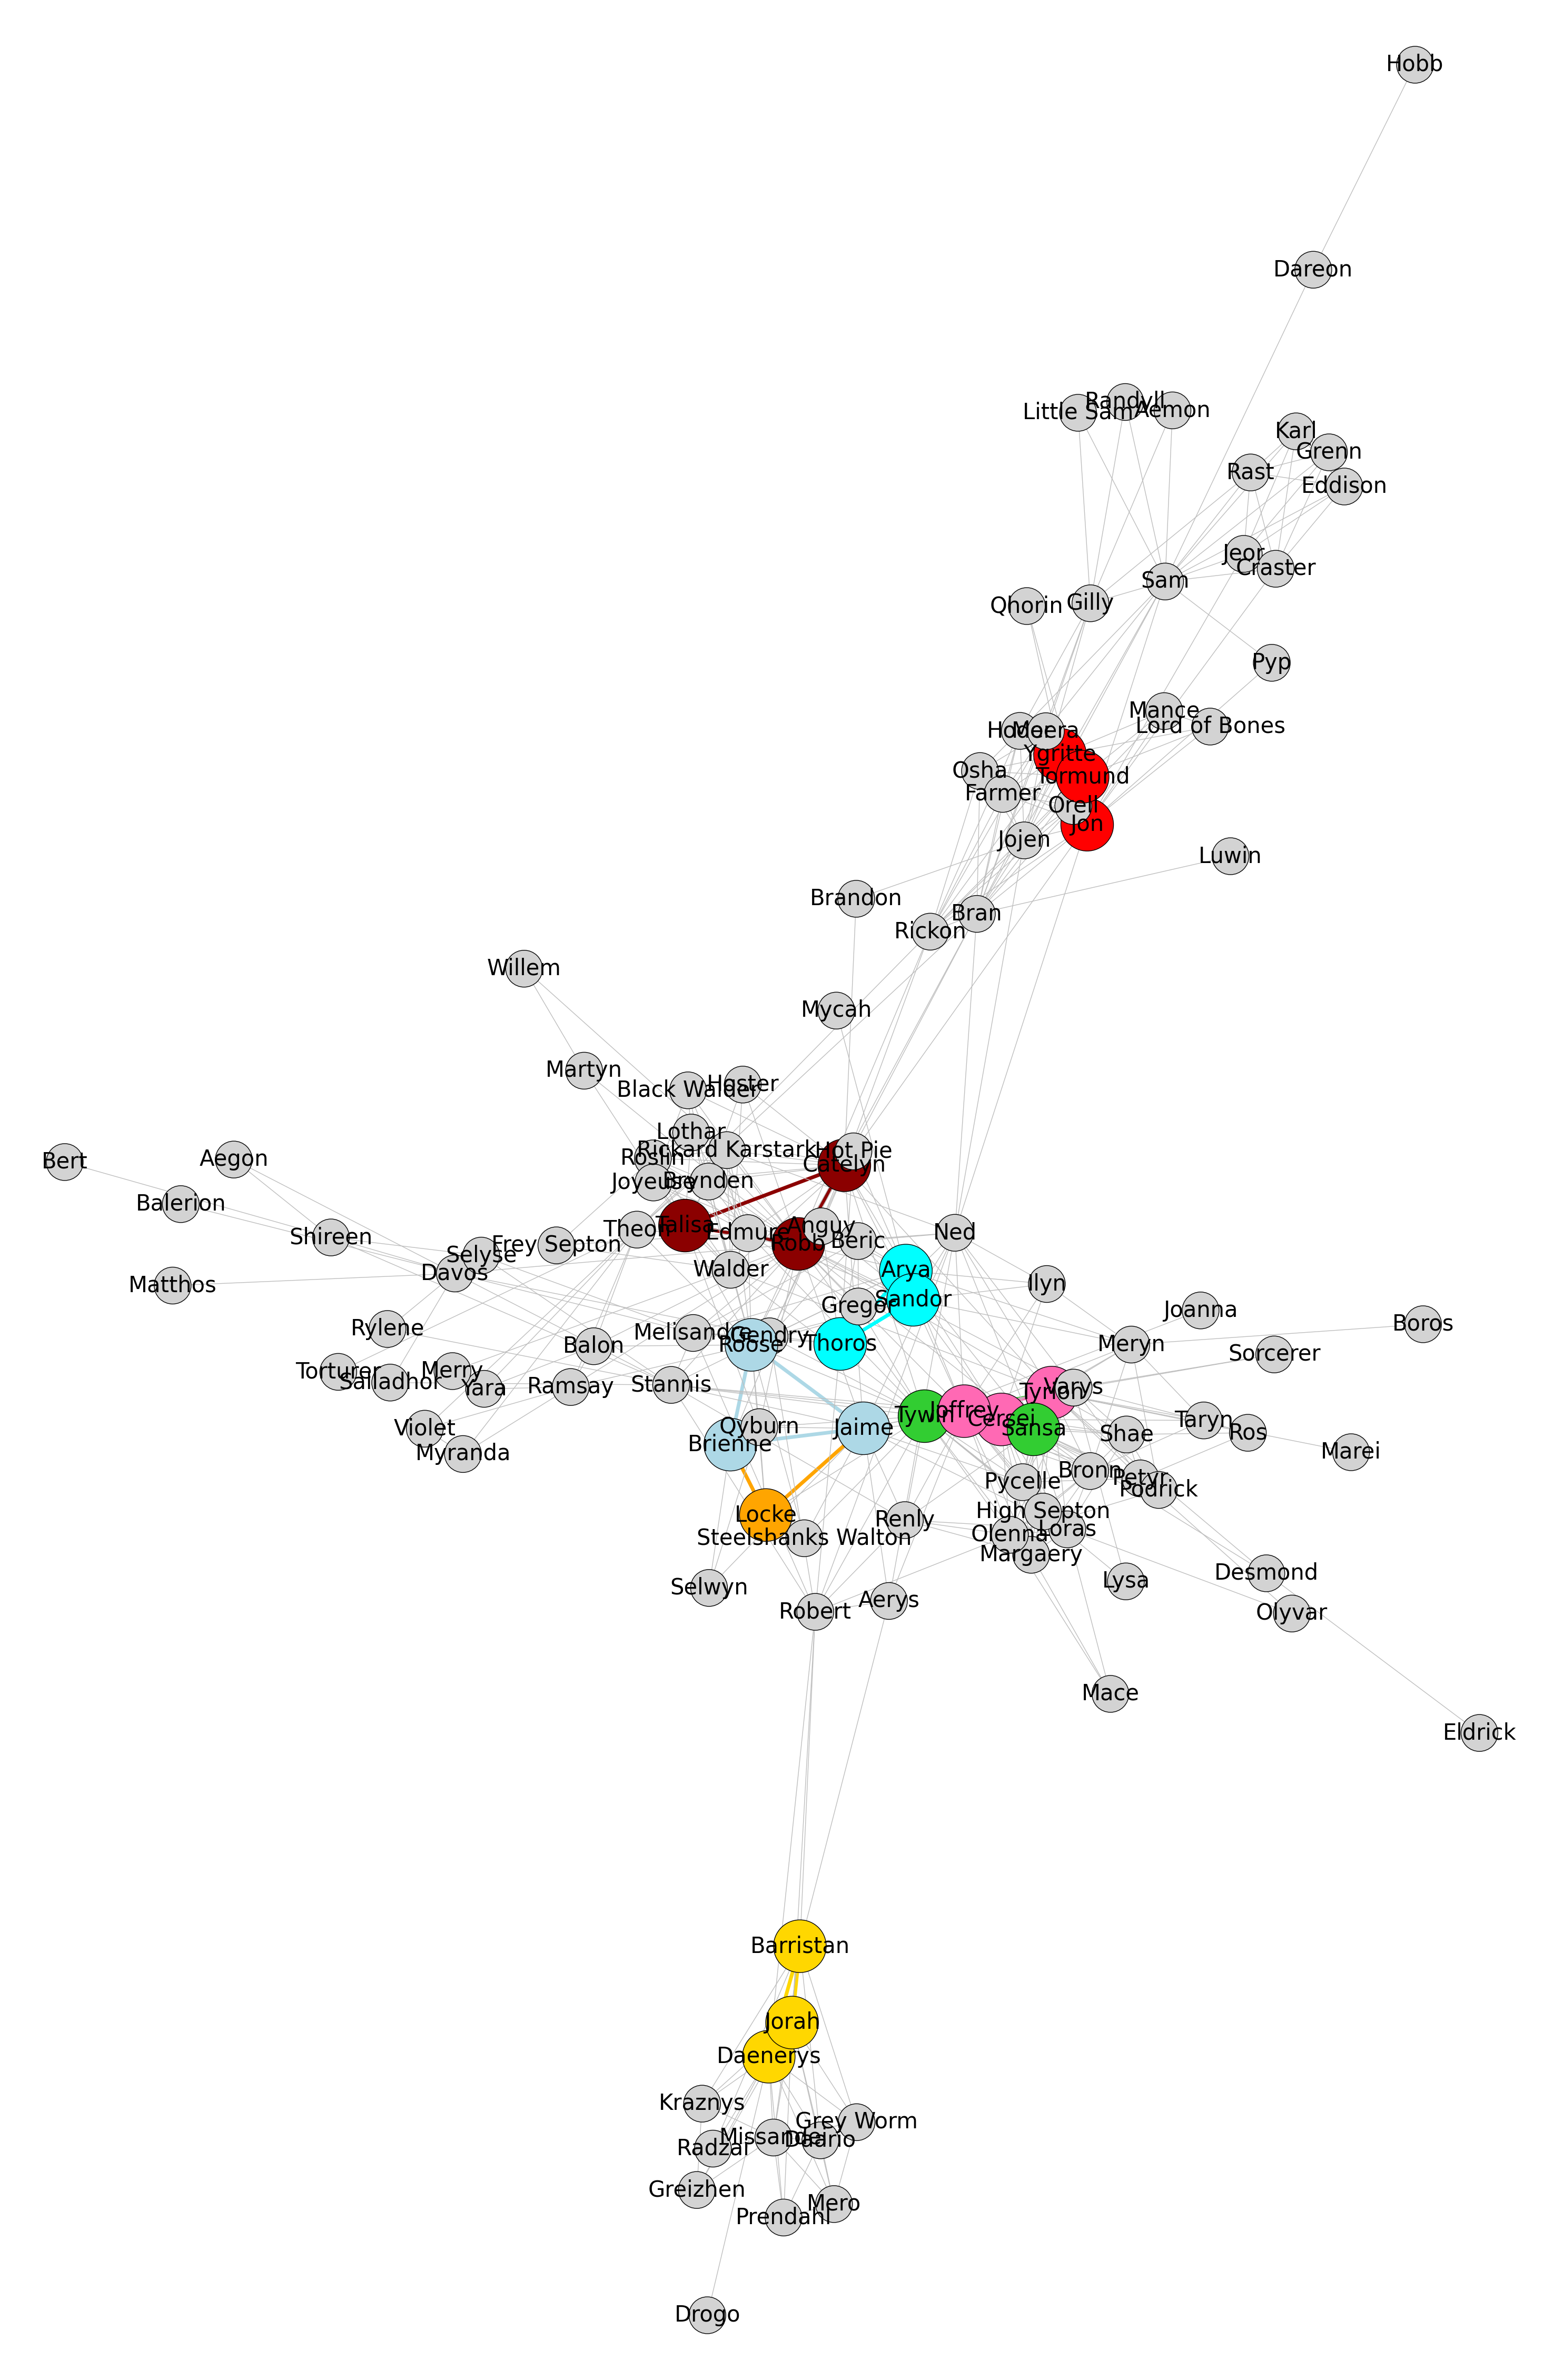

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import igraph as ig

# Define the highlighted triangles with colors
highlighted_triangles = [
    (('JON', 'YGRITTE', 'TORMUND'), "Red"),
    (('TYRION', 'TYWIN', 'SANSA'), "Yellow"),
    (('BRIENNE', 'JAIME', 'LOCKE'), "Orange"),
    (('TYRION', 'TYWIN', 'SANSA'), "LimeGreen"),
    (('TYRION', 'CERSEI', 'JOFFREY'), "HotPink"),
    (('ROBB', 'TALISA', 'CATELYN'), "DarkRed"),
    (('BRIENNE', 'JAIME', 'ROOSE_BOLTON'), "LightBlue"),
    (('DAENERYS', 'JORAH', 'BARRISTAN'), "Gold"),
    (('ARYA', 'HOUND', 'THOROS'), "Cyan"),

]

# Compute positions using spring layout
community_graph_layout_gn = nx.spring_layout(G)

# Define default color for nodes and edges
default_node_color = "lightgrey"
default_edge_color = "grey"

# Initialize node colors and sizes
node_colors = [default_node_color] * len(G.nodes())
node_sizes = [70] * len(G.nodes())

# Initialize edge colors and widths
edge_colors = [default_edge_color] * len(G.edges())
edge_widths = [1] * len(G.edges())

# Convert edges to sets for efficient lookup
edges_set = set(map(frozenset, G.edges()))

# Function to compute the strength of a triangle and the maximum edge weight
def compute_triangle_strength_and_max_edge(triangle, graph):
    nodes = list(triangle)
    strength = 0
    max_edge_weight = 0
    max_edge = None
    for i in range(3):
        for j in range(i + 1, 3):
            edge = (nodes[i], nodes[j]) if (nodes[i], nodes[j]) in graph.edges() else (nodes[j], nodes[i])
            if edge in graph.edges():
                edge_weight = graph[edge[0]][edge[1]]['Weight']
                strength += edge_weight
                if edge_weight > max_edge_weight:
                    max_edge_weight = edge_weight
                    max_edge = edge
    return strength, max_edge_weight, max_edge

# Highlight the nodes and edges in the triangles and compute strengths and max edge weights
triangle_strengths_and_max_edges = []
for idx, (triangle, color) in enumerate(highlighted_triangles):
    strength, max_edge_weight, max_edge = compute_triangle_strength_and_max_edge(triangle, G)
    triangle_strengths_and_max_edges.append((triangle, strength, max_edge_weight, max_edge))

    for node in triangle:
        if node in G.nodes():
            node_index = list(G.nodes()).index(node)
            node_colors[node_index] = color  # Node color based on triangle color
            node_sizes[node_index] = 100  # Larger size for highlighted nodes

    for i in range(3):
        for j in range(i + 1, 3):
            edge = (triangle[i], triangle[j]) if (triangle[i], triangle[j]) in G.edges() else (triangle[j], triangle[i])
            if edge in G.edges():
                edge_index = list(G.edges()).index(edge)
                edge_colors[edge_index] = color  # Edge color based on triangle color
                edge_widths[edge_index] = 5  # Thicker edge for edges in triangles

# Print the strengths of the triangles, the highest edge weights, and the names of the edges
for triangle, strength, max_edge_weight, max_edge in triangle_strengths_and_max_edges:
    print(f"Triangle {triangle} has strength {strength}, the highest edge strength is {max_edge_weight}, and the strongest edge is {max_edge}")

# Add positions to igraph nodes
positions = community_graph_layout_gn
g.vs["x"] = [positions[node][0] for node in G.nodes()]
g.vs["y"] = [positions[node][1] for node in G.nodes()]

# Plot the graph with igraph
fig, ax = plt.subplots(figsize=(45, 45))
ax.set_xlim(min(g.vs["x"]) - 0.05, max(g.vs["x"]) + 0.05)
ax.set_ylim(min(g.vs["y"]) - 0.05, max(g.vs["y"]) + 0.05)
ax.set_xticks([])
ax.set_yticks([])
ax.set_aspect('equal')
fig.subplots_adjust(left=0, right=1, top=1, bottom=0)

# Plot the graph with igraph
ig.plot(
    g,
    target=ax,
    layout=[(pos[0], pos[1]) for pos in positions.values()],
    vertex_color=node_colors,
    vertex_size=node_sizes,
    vertex_label=g.vs["Label"],
    vertex_label_size=30,
    edge_color=edge_colors,
    edge_width=edge_widths
)

plt.show()


Specifically about a character

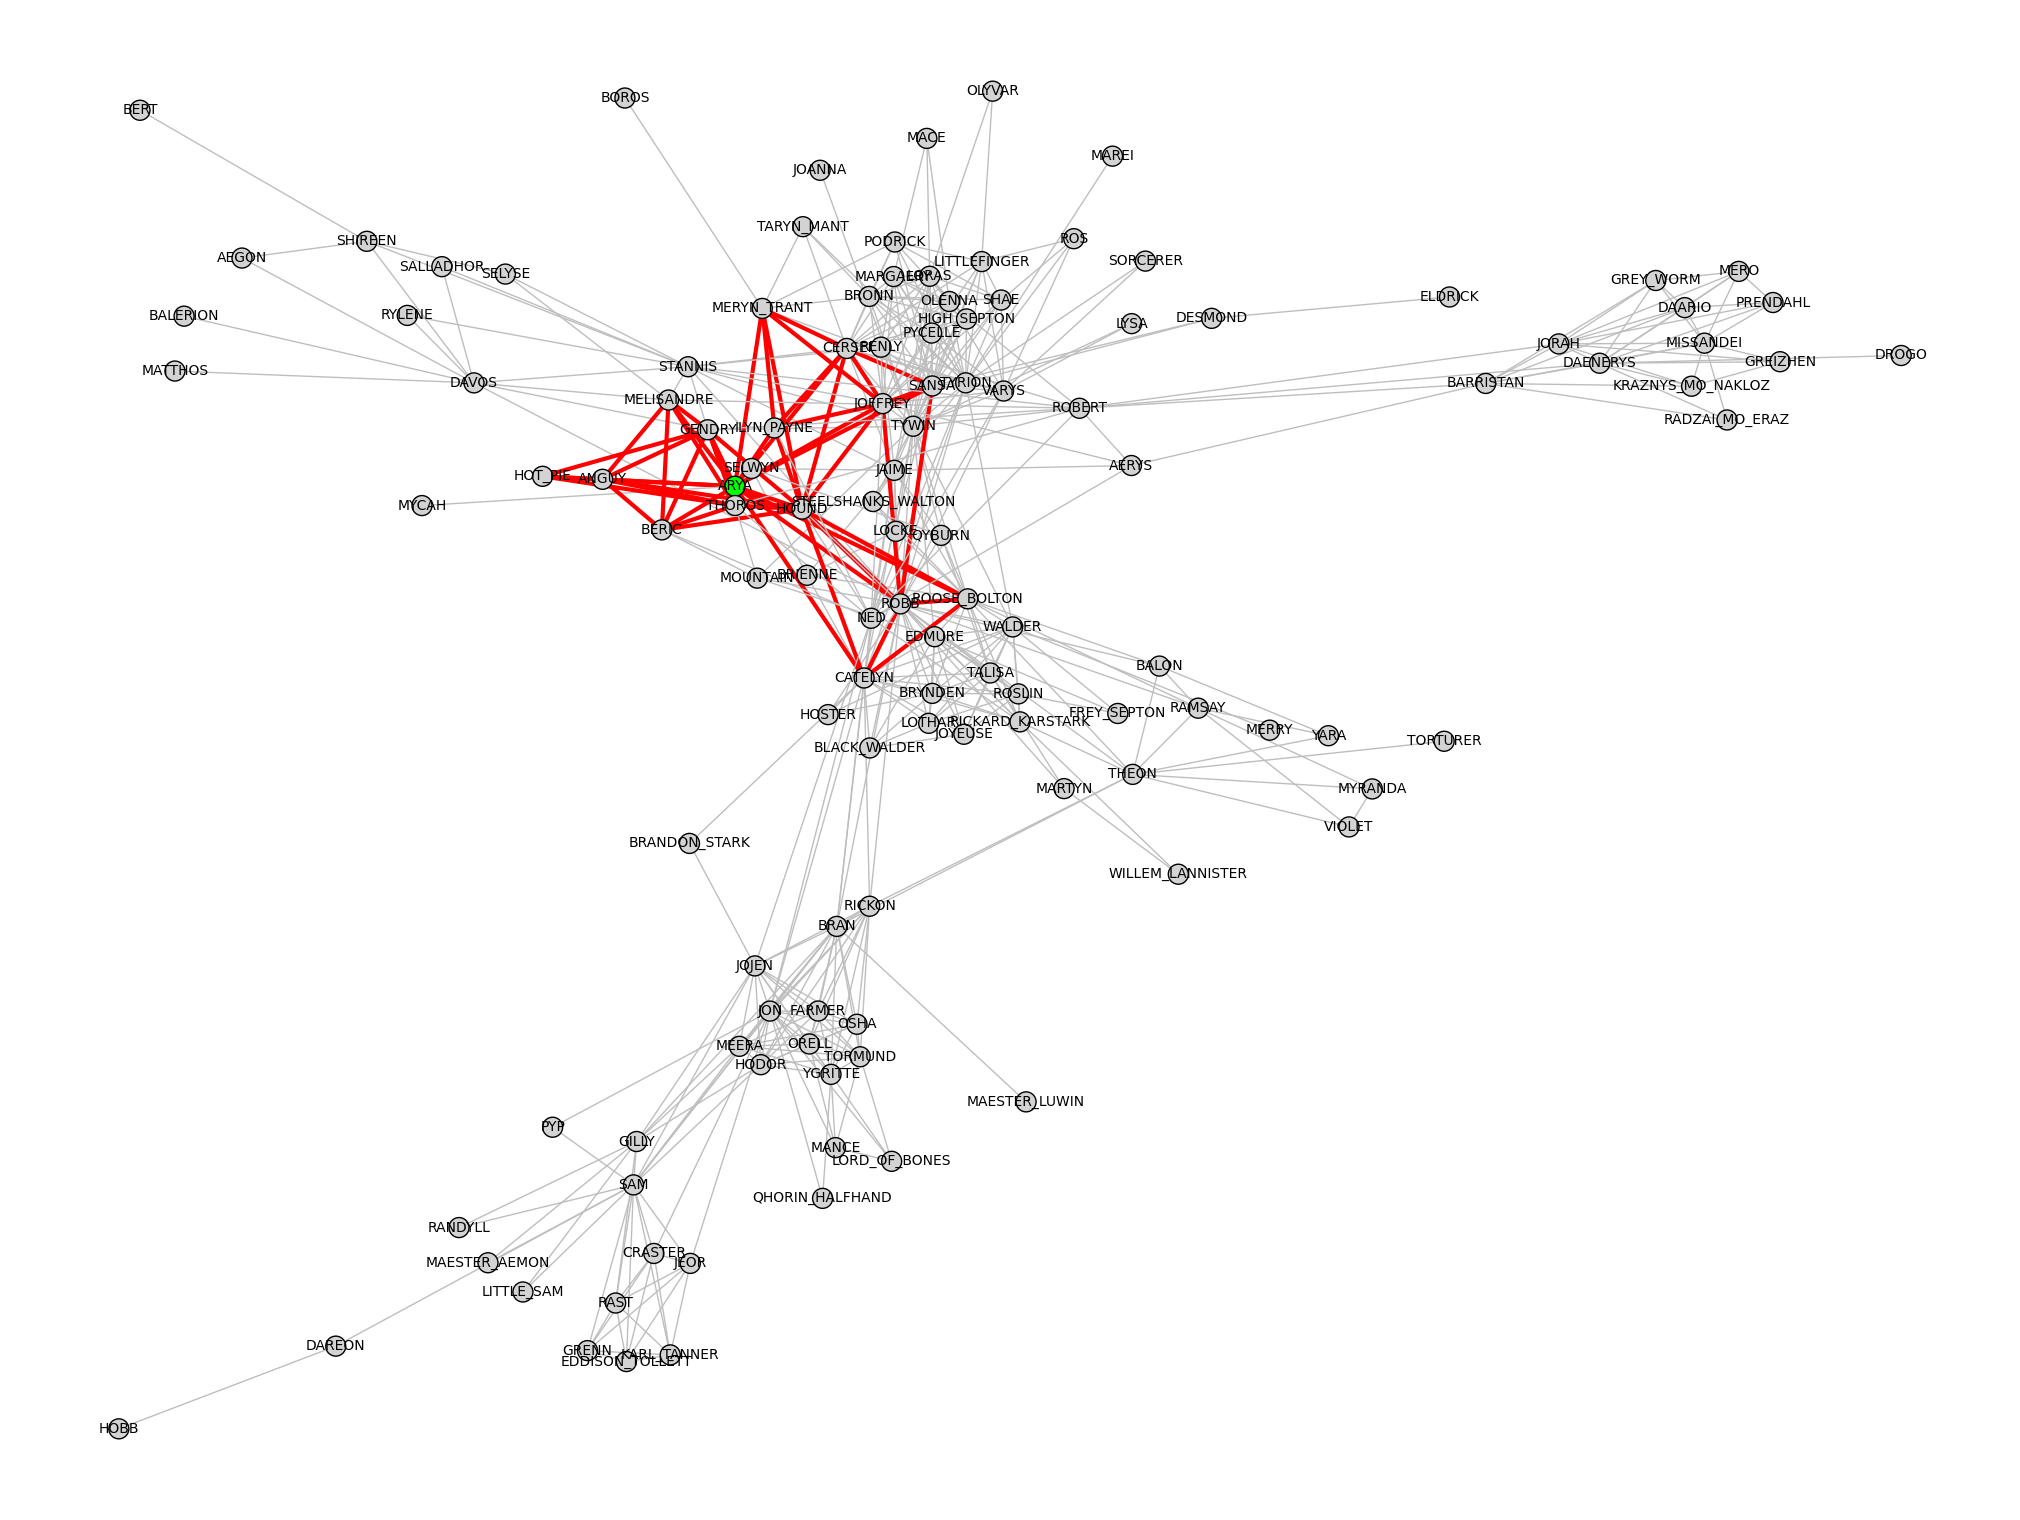

In [ ]:
highlight_node = "ARYA"  # replace this with the actual node identifier

def find_triangles_with_node(G, node):
    triangles = []
    for n in G:
        neighbors = list(G.neighbors(n))
        for nbr, nbr2 in itertools.combinations(neighbors, 2):
            if G.has_edge(nbr, nbr2) and node in (n, nbr, nbr2):
                triangles.append((n, nbr, nbr2))
    return triangles

# Compute positions using spring layout
community_graph_layout_gn = nx.spring_layout(G)

# Prepare colors for nodes and edges
node_colors = []
edge_colors = []
for node in G.nodes():
    if node == highlight_node:
        node_colors.append("green")  # Highlight TYRION node
    else:
        node_colors.append("lightgrey")

# Initialize edge colors and widths
edge_colors = ["grey"] * len(G.edges())
edge_widths = [1] * len(G.edges())

# Find triangles involving TYRION
highlighted_triangles = find_triangles_with_node(G, highlight_node)

# Highlight edges in triangles involving TYRION
for triangle in highlighted_triangles:
    triangle_edges = [
        (triangle[0], triangle[1]),
        (triangle[1], triangle[2]),
        (triangle[2], triangle[0])
    ]
    for edge in triangle_edges:
        try:
            if edge in G.edges():
                edge_index = list(G.edges()).index(edge)
            elif (edge[1], edge[0]) in G.edges():
                edge_index = list(G.edges()).index((edge[1], edge[0]))
            else:
                continue  # Skip if edge not found in G.edges()

            edge_colors[edge_index] = "red"  # Color edges in triangles with red
            edge_widths[edge_index] = 3  # Thicker width for edges in triangles
        except ValueError:
            pass  # Ignore ValueError if edge not found in G.edges()

# Add positions to igraph nodes
g = ig.Graph(directed=False)
g.add_vertices(list(G.nodes()))
g.add_edges(list(G.edges()))
g.vs["x"] = [community_graph_layout_gn[node][0] for node in G.nodes()]
g.vs["y"] = [community_graph_layout_gn[node][1] for node in G.nodes()]
g.vs["Label"] = list(G.nodes())

node_sizes = [20] * len(G.nodes())

# Plot the graph with igraph
fig, ax = plt.subplots(figsize=(20, 15))
ax.set_xlim(min(g.vs["x"]) - 0.1, max(g.vs["x"]) + 0.1)
ax.set_ylim(min(g.vs["y"]) - 0.1, max(g.vs["y"]) + 0.1)
ax.set_xticks([])
ax.set_yticks([])
ax.set_aspect('auto')
fig.subplots_adjust(left=0, right=1, top=1, bottom=0)

# Plot the graph with igraph
ig.plot(
    g,
    target=ax,
    layout=[(pos[0], pos[1]) for pos in zip(g.vs["x"], g.vs["y"])],
    vertex_color=node_colors,
    vertex_size=node_sizes,
    vertex_label=g.vs["Label"],
    vertex_label_size=10,
    edge_color=edge_colors,
    edge_width=edge_widths
)

plt.show()

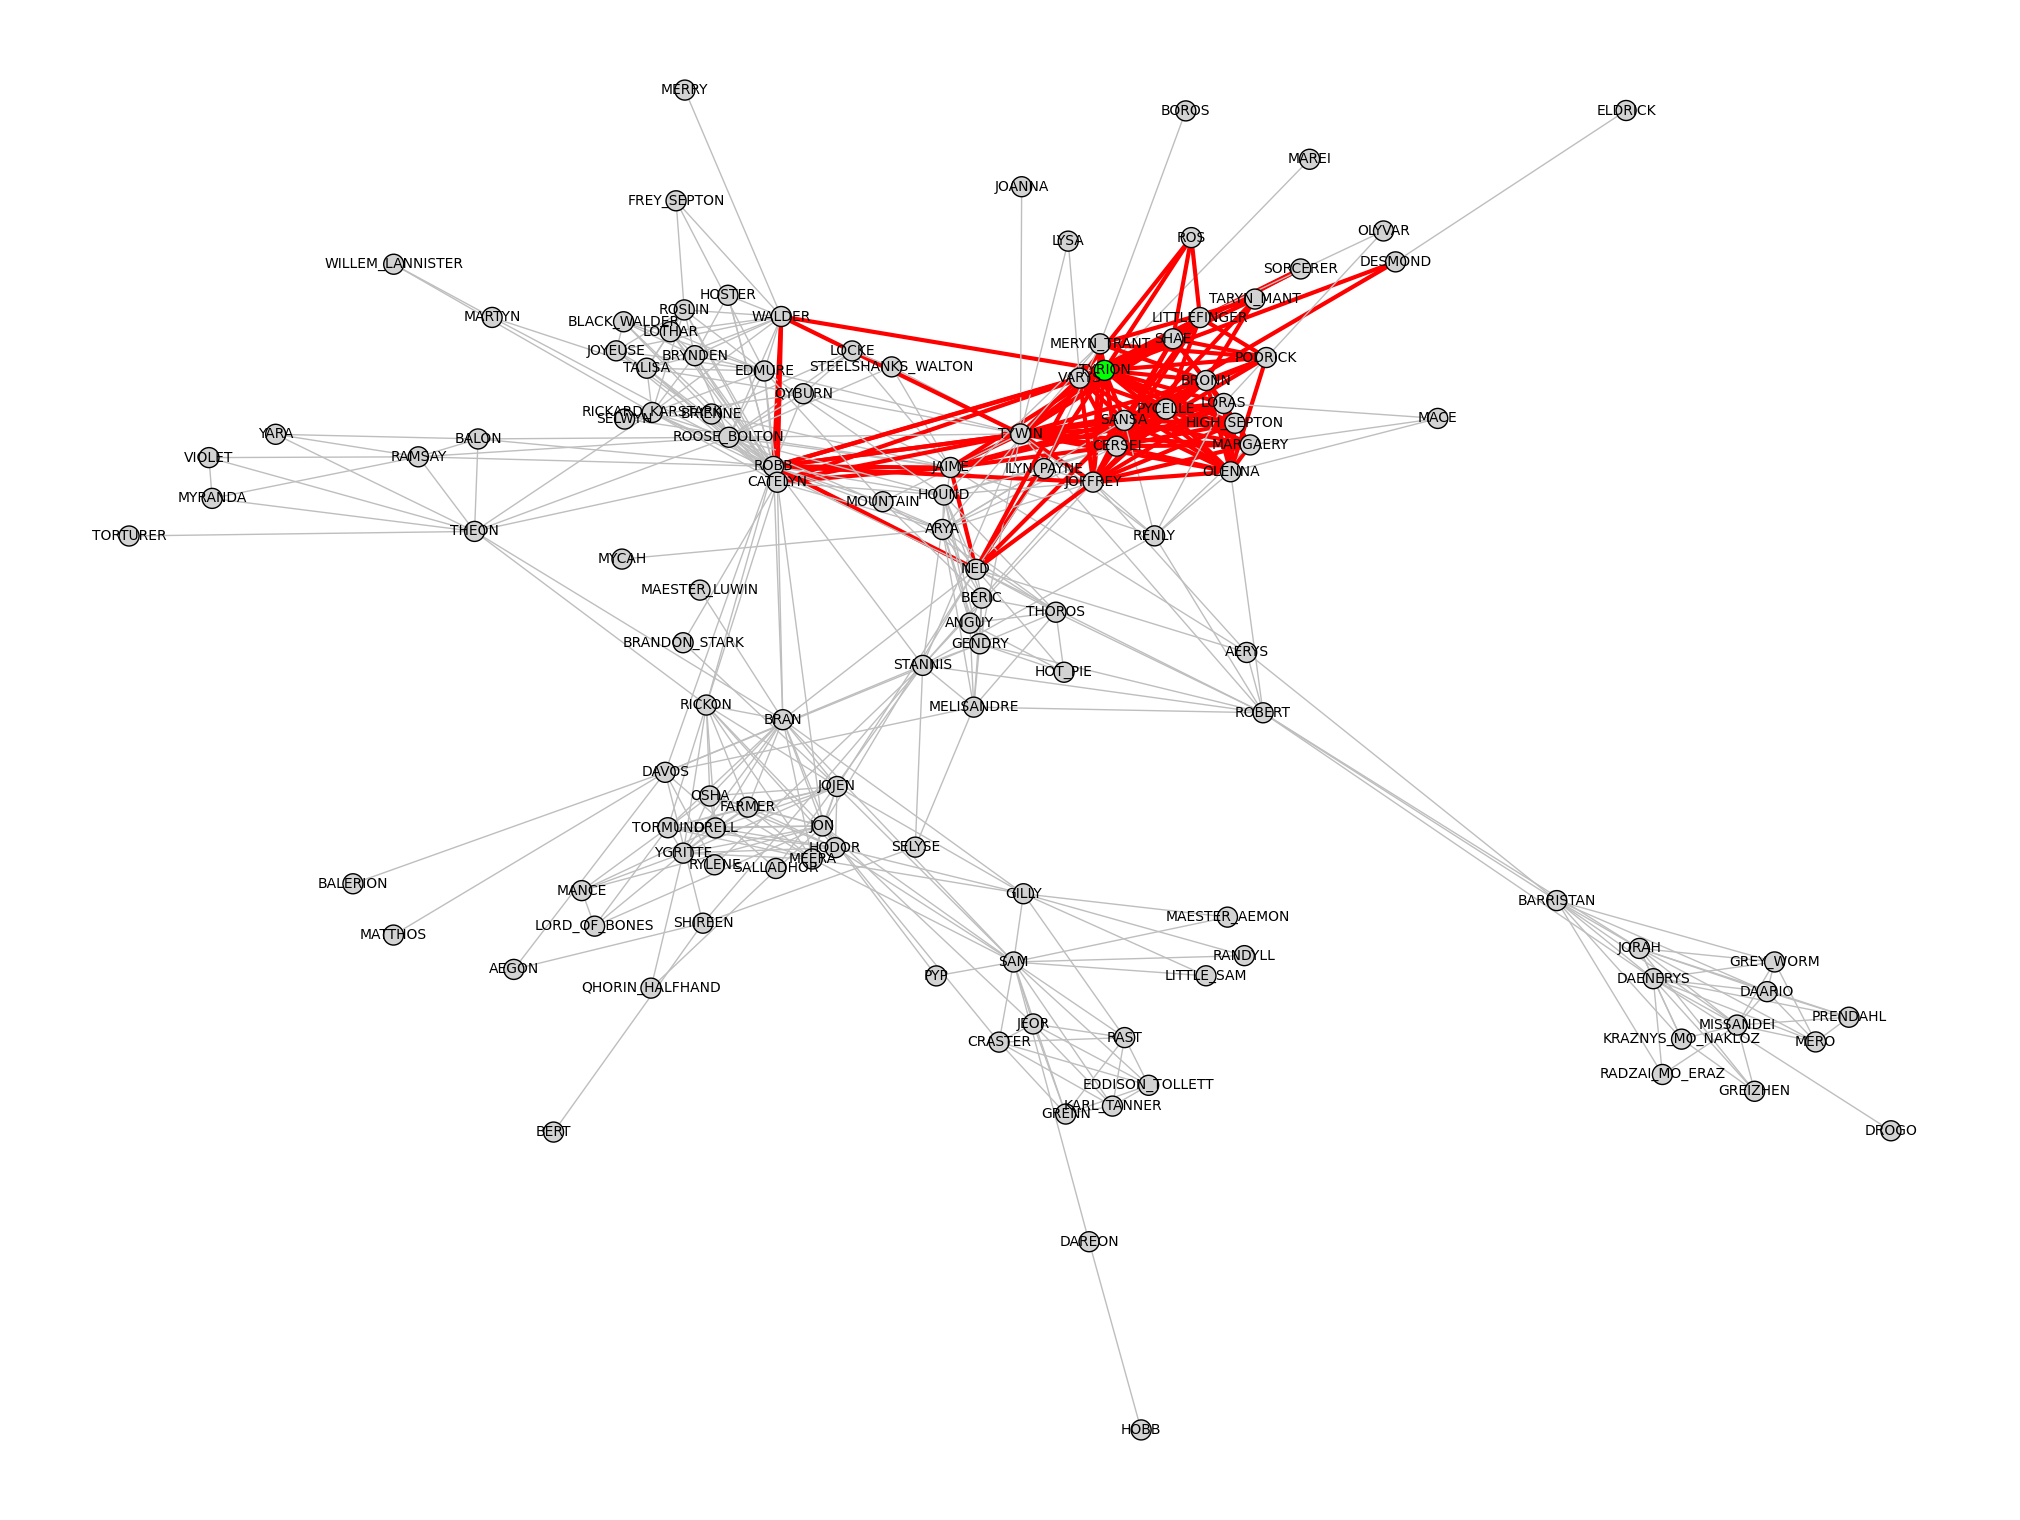

In [ ]:
highlight_node = "TYRION"  # replace this with the actual node identifier

def find_triangles_with_node(G, node):
    triangles = []
    for n in G:
        neighbors = list(G.neighbors(n))
        for nbr, nbr2 in itertools.combinations(neighbors, 2):
            if G.has_edge(nbr, nbr2) and node in (n, nbr, nbr2):
                triangles.append((n, nbr, nbr2))
    return triangles

# Compute positions using spring layout
community_graph_layout_gn = nx.spring_layout(G)

# Prepare colors for nodes and edges
node_colors = []
edge_colors = []
for node in G.nodes():
    if node == highlight_node:
        node_colors.append("green")  # Highlight TYRION node
    else:
        node_colors.append("lightgrey")

# Initialize edge colors and widths
edge_colors = ["grey"] * len(G.edges())
edge_widths = [1] * len(G.edges())

# Find triangles involving TYRION
highlighted_triangles = find_triangles_with_node(G, highlight_node)

# Highlight edges in triangles involving TYRION
for triangle in highlighted_triangles:
    triangle_edges = [
        (triangle[0], triangle[1]),
        (triangle[1], triangle[2]),
        (triangle[2], triangle[0])
    ]
    for edge in triangle_edges:
        try:
            if edge in G.edges():
                edge_index = list(G.edges()).index(edge)
            elif (edge[1], edge[0]) in G.edges():
                edge_index = list(G.edges()).index((edge[1], edge[0]))
            else:
                continue  # Skip if edge not found in G.edges()

            edge_colors[edge_index] = "red"  # Color edges in triangles with red
            edge_widths[edge_index] = 3  # Thicker width for edges in triangles
        except ValueError:
            pass  # Ignore ValueError if edge not found in G.edges()

# Add positions to igraph nodes
g = ig.Graph(directed=False)
g.add_vertices(list(G.nodes()))
g.add_edges(list(G.edges()))
g.vs["x"] = [community_graph_layout_gn[node][0] for node in G.nodes()]
g.vs["y"] = [community_graph_layout_gn[node][1] for node in G.nodes()]
g.vs["Label"] = list(G.nodes())

node_sizes = [20] * len(G.nodes())

# Plot the graph with igraph
fig, ax = plt.subplots(figsize=(20, 15))
ax.set_xlim(min(g.vs["x"]) - 0.1, max(g.vs["x"]) + 0.1)
ax.set_ylim(min(g.vs["y"]) - 0.1, max(g.vs["y"]) + 0.1)
ax.set_xticks([])
ax.set_yticks([])
ax.set_aspect('auto')
fig.subplots_adjust(left=0, right=1, top=1, bottom=0)

# Plot the graph with igraph
ig.plot(
    g,
    target=ax,
    layout=[(pos[0], pos[1]) for pos in zip(g.vs["x"], g.vs["y"])],
    vertex_color=node_colors,
    vertex_size=node_sizes,
    vertex_label=g.vs["Label"],
    vertex_label_size=10,
    edge_color=edge_colors,
    edge_width=edge_widths
)

plt.show()

### Clustering Coefficients

GENERAL INDICATION OF THE GRAPH'S TENDENCY TO BE ORGANISED INTO CLUSTERS

If a node has fewer than 2 neighbors, the clustering coefficient is undefined, and the returned value is NaN

In [ ]:
# Global Clustering Coefficient (Triadic Closure) - NUMBER OF CLOSED TRIPLETS/NUMBER OF POSSIBLE TRIPLETS

print("Global clustering coefficient (Triadic Closure)", g.transitivity_undirected())

Global clustering coefficient (Triadic Closure) 0.4810656836461126


In [ ]:
# Local Clustering Coefficient - ARE THE NEIGHBOURS OF THE NODES ALSO CONNECTED?
print("Local clustering components:")
local_ccs = g.transitivity_local_undirected()
sum_cc = 0
for local_cc in local_ccs:
    if not math.isnan(local_cc):
        sum_cc += local_cc

for node in nodes:
        print("   Local clustering coefficient of node", node["Label"],":",local_ccs[node.index])

Local clustering components:
   Local clustering coefficient of node Jon : 0.3742690058479532
   Local clustering coefficient of node Ygritte : 0.6666666666666666
   Local clustering coefficient of node Brienne : 0.6
   Local clustering coefficient of node Jaime : 0.3014705882352941
   Local clustering coefficient of node Tyrion : 0.33666666666666667
   Local clustering coefficient of node Tywin : 0.28078817733990147
   Local clustering coefficient of node Ramsay : 0.5238095238095238
   Local clustering coefficient of node Theon : 0.2909090909090909
   Local clustering coefficient of node Cersei : 0.4473684210526316
   Local clustering coefficient of node Gilly : 0.3888888888888889
   Local clustering coefficient of node Sam : 0.2647058823529412
   Local clustering coefficient of node Robb : 0.22795698924731184
   Local clustering coefficient of node Talisa : 0.6212121212121212
   Local clustering coefficient of node Sansa : 0.5029239766081871
   Local clustering coefficient of node Ar

In [ ]:
# Average Clustering Coefficient of the graph:

print("Average clustering component", sum_cc/len(g.vs()))


Average clustering component 0.5966873081130292


## Communities

In [ ]:
# Checking Strength of Connections between characters for quick and handy insights.

def get_edge_strength(G, node1, node2):
    # Check if the edge exists
    if G.has_edge(node1, node2) or G.has_edge(node2, node1):
        # Get the weight of the edge
        edge_weight = G[node1][node2]['Weight']
        # Get the degrees of the nodes
        degree_node1 = G.degree(node1)
        degree_node2 = G.degree(node2)
        # Compute the strength of the edge as the sum of the degrees and the weight
        edge_strength = edge_weight
        return edge_strength
    else:
        return None  # Edge does not exist


node1 = "GENDRY"
node2 = "STANNIS"

edge_strength = get_edge_strength(G, node1, node2)

if edge_strength is not None:
    print(f"The strength of the edge between '{node1}' and '{node2}' is {edge_strength}.")
else:
    print(f"There is no edge between '{node1}' and '{node2}'.")

The strength of the edge between 'GENDRY' and 'STANNIS' is 9.


### Infomap

In [ ]:
infomap = g.community_infomap()

In [ ]:
infomap_comm = infomap.membership

# Create a dictionary to hold clusters
clusters = {}

# Group nodes into clusters based on their community membership
for i, node in enumerate(G.nodes()):
    community = infomap_comm[i]
    if community not in clusters:
        clusters[community] = []
    clusters[community].append(node)

# Convert the clusters dictionary to a list of clusters
infomap_comm = [clusters[community] for community in sorted(clusters)]

n_comm_infomap = len(infomap_comm)
print("Number of communities detected:", n_comm_infomap)

Number of communities detected: 11


In [ ]:
print("List of Characters by Community")
for i, cluster in enumerate(infomap_comm):
    print(f"Cluster {i+1}: {cluster}")

List of Characters by Community
Cluster 1: ['JON', 'YGRITTE', 'BRAN', 'OSHA', 'JOJEN', 'HODOR', 'ORELL', 'MANCE', 'TORMUND', 'MEERA', 'RICKON', 'FARMER', 'LORD_OF_BONES', 'BRANDON_STARK', 'MAESTER_LUWIN', 'QHORIN_HALFHAND']
Cluster 2: ['BRIENNE', 'JAIME', 'LOCKE', 'QYBURN', 'ROOSE_BOLTON', 'STEELSHANKS_WALTON', 'SELWYN']
Cluster 3: ['TYRION', 'TYWIN', 'CERSEI', 'SANSA', 'SHAE', 'BRONN', 'JOFFREY', 'MARGAERY', 'OLENNA', 'VARYS', 'LITTLEFINGER', 'PODRICK', 'LORAS', 'ROS', 'OLYVAR', 'MERYN_TRANT', 'PYCELLE', 'TARYN_MANT', 'RENLY', 'MACE', 'MAREI', 'SORCERER', 'HIGH_SEPTON', 'JOANNA', 'BOROS', 'LYSA']
Cluster 4: ['RAMSAY', 'THEON', 'MYRANDA', 'VIOLET', 'TORTURER', 'BALON', 'YARA']
Cluster 5: ['GILLY', 'SAM', 'JEOR', 'RAST', 'CRASTER', 'GRENN', 'KARL_TANNER', 'EDDISON_TOLLETT', 'MAESTER_AEMON', 'LITTLE_SAM', 'PYP', 'RANDYLL']
Cluster 6: ['ROBB', 'TALISA', 'CATELYN', 'EDMURE', 'RICKARD_KARSTARK', 'WALDER', 'BRYNDEN', 'ROSLIN', 'MARTYN', 'BLACK_WALDER', 'HOSTER', 'LOTHAR', 'JOYEUSE', 'WILLEM_

In [ ]:
#community_graph_layout_infomap = nx.spring_layout(G, k=2/np.sqrt(len(G.nodes())))
community_graph_layout_infomap = nx.spring_layout(G)
# Prepare colors for the communities
colors = ["LightCoral", "Gold", "LightGreen", "DeepSkyBlue", "Orchid", "MistyRose", "Cyan", "Orange", "Red", "DarkRed", "DarkGreen"]


node_colors = []
node_sizes = []

for node in G.nodes():
    for i, community in enumerate(infomap_comm):
        if node in community:
            node_colors.append(colors[i % len(colors)])
            node_sizes.append(70)
            break

# Add positions to igraph nodes
positions = community_graph_layout_infomap
g.vs["x"] = [positions[node][0] for node in G.nodes()]
g.vs["y"] = [positions[node][1] for node in G.nodes()]


# Plot the graph with igraph
fig, ax = plt.subplots(figsize=(45, 35))
ax.set_xlim(min(g.vs["x"])-0.05, max(g.vs["x"])+0.05)
ax.set_ylim(min(g.vs["y"])-0.05, max(g.vs["y"])+0.05)
ax.set_xticks([])
ax.set_yticks([])
ax.set_aspect('equal')
fig.subplots_adjust(left=0, right=1, top=1, bottom=0)

ig.plot(
    g,
    target=ax,
    layout=[(pos[0], pos[1]) for pos in positions.values()],
    vertex_color=node_colors,
    vertex_size=node_sizes,
    vertex_label=g.vs["Label"],
    vertex_label_size = 10,
    edge_color = "grey"

)




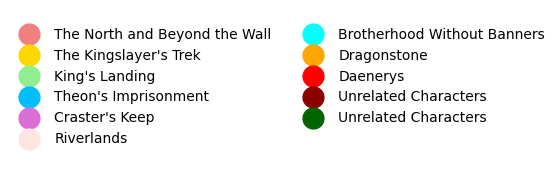

In [ ]:
fig_legend, ax_legend = plt.subplots(figsize=(2,2))

# Hardcoding each legend entry
ax_legend.plot([], [], color="LightCoral", marker='o', markersize=15, linestyle='None', label="The North and Beyond the Wall")
ax_legend.plot([], [], color="Gold", marker='o', markersize=15, linestyle='None', label="The Kingslayer's Trek")
ax_legend.plot([], [], color="LightGreen", marker='o', markersize=15, linestyle='None', label="King's Landing ")
ax_legend.plot([], [], color="DeepSkyBlue", marker='o', markersize=15, linestyle='None', label="Theon's Imprisonment")
ax_legend.plot([], [], color="Orchid", marker='o', markersize=15, linestyle='None', label="Craster's Keep")
ax_legend.plot([], [], color="MistyRose", marker='o', markersize=15, linestyle='None', label="Riverlands")
ax_legend.plot([], [], color="Cyan", marker='o', markersize=15, linestyle='None', label="Brotherhood Without Banners")
ax_legend.plot([], [], color="Orange", marker='o', markersize=15, linestyle='None', label="Dragonstone")
ax_legend.plot([], [], color="Red", marker='o', markersize=15, linestyle='None', label="Daenerys")
ax_legend.plot([], [], color="DarkRed", marker='o', markersize=15, linestyle='None', label="Unrelated Characters")
ax_legend.plot([], [], color="DarkGreen", marker='o', markersize=15, linestyle='None', label="Unrelated Characters")

ax_legend.legend(loc='center', frameon=False, ncol=2)
ax_legend.axis('off')

plt.show()

In [ ]:
#modularity = np.round(g.modularity(infomap_comm), 3)
#print("The Modularity for the Infomap Method is",modularity)

modularity_infomap = round(nx.community.modularity(G, infomap_comm),3)
print("The Modularity for the Infomap Method is",modularity_infomap)

The Modularity for the Infomap Method is 0.616


### Girvan-Newman

In [ ]:
#compute girvan newman communities
from networkx.algorithms import community
com_gn = community.girvan_newman(G)

# To get the communities at different levels
levels = []

desired_number_of_communities=6

for communities in com_gn:
    levels.append(communities)
    if len(communities) >= desired_number_of_communities:
        break

# The last entry in levels contains the desired number of communities
g_n_comm = [sorted(list(c)) for c in levels[-1]]
n_comm_g_n = len(g_n_comm)
print("Number of communities detected:", n_comm_g_n)
print("Communities:", g_n_comm)




Number of communities detected: 6
Communities: [['BRAN', 'BRANDON_STARK', 'CRASTER', 'DAREON', 'EDDISON_TOLLETT', 'FARMER', 'GILLY', 'GRENN', 'HOBB', 'HODOR', 'JEOR', 'JOJEN', 'JON', 'KARL_TANNER', 'LITTLE_SAM', 'LORD_OF_BONES', 'MAESTER_AEMON', 'MAESTER_LUWIN', 'MANCE', 'MEERA', 'ORELL', 'OSHA', 'PYP', 'QHORIN_HALFHAND', 'RANDYLL', 'RAST', 'RICKON', 'SAM', 'TORMUND', 'YGRITTE'], ['BLACK_WALDER', 'BRIENNE', 'BRYNDEN', 'CATELYN', 'EDMURE', 'FREY_SEPTON', 'HOSTER', 'JOYEUSE', 'LOCKE', 'LOTHAR', 'MARTYN', 'MERRY', 'MOUNTAIN', 'QYBURN', 'RICKARD_KARSTARK', 'ROBB', 'ROOSE_BOLTON', 'ROSLIN', 'SELWYN', 'STEELSHANKS_WALTON', 'TALISA', 'WALDER', 'WILLEM_LANNISTER'], ['AERYS', 'ANGUY', 'ARYA', 'BERIC', 'BOROS', 'BRONN', 'CERSEI', 'DESMOND', 'ELDRICK', 'GENDRY', 'HIGH_SEPTON', 'HOT_PIE', 'HOUND', 'ILYN_PAYNE', 'JAIME', 'JOANNA', 'JOFFREY', 'LITTLEFINGER', 'LORAS', 'LYSA', 'MACE', 'MAREI', 'MARGAERY', 'MELISANDRE', 'MERYN_TRANT', 'MYCAH', 'NED', 'OLENNA', 'OLYVAR', 'PODRICK', 'PYCELLE', 'RENLY', '

In [ ]:
# Print each community list
print("List of the characters, divided per communities:")
for idx, community in enumerate(g_n_comm):
    print(f"Cluster {idx + 1}: {community}")

List of the characters, divided per communities:
Cluster 1: ['BRAN', 'BRANDON_STARK', 'CRASTER', 'DAREON', 'EDDISON_TOLLETT', 'FARMER', 'GILLY', 'GRENN', 'HOBB', 'HODOR', 'JEOR', 'JOJEN', 'JON', 'KARL_TANNER', 'LITTLE_SAM', 'LORD_OF_BONES', 'MAESTER_AEMON', 'MAESTER_LUWIN', 'MANCE', 'MEERA', 'ORELL', 'OSHA', 'PYP', 'QHORIN_HALFHAND', 'RANDYLL', 'RAST', 'RICKON', 'SAM', 'TORMUND', 'YGRITTE']
Cluster 2: ['BLACK_WALDER', 'BRIENNE', 'BRYNDEN', 'CATELYN', 'EDMURE', 'FREY_SEPTON', 'HOSTER', 'JOYEUSE', 'LOCKE', 'LOTHAR', 'MARTYN', 'MERRY', 'MOUNTAIN', 'QYBURN', 'RICKARD_KARSTARK', 'ROBB', 'ROOSE_BOLTON', 'ROSLIN', 'SELWYN', 'STEELSHANKS_WALTON', 'TALISA', 'WALDER', 'WILLEM_LANNISTER']
Cluster 3: ['AERYS', 'ANGUY', 'ARYA', 'BERIC', 'BOROS', 'BRONN', 'CERSEI', 'DESMOND', 'ELDRICK', 'GENDRY', 'HIGH_SEPTON', 'HOT_PIE', 'HOUND', 'ILYN_PAYNE', 'JAIME', 'JOANNA', 'JOFFREY', 'LITTLEFINGER', 'LORAS', 'LYSA', 'MACE', 'MAREI', 'MARGAERY', 'MELISANDRE', 'MERYN_TRANT', 'MYCAH', 'NED', 'OLENNA', 'OLYVAR', 

In [ ]:
community_graph_layout_gn = nx.spring_layout(G)
# Prepare colors for the communities
colors = ["LightCoral", "Gold", "LightGreen", "DeepSkyBlue", "Orchid", "Cyan"]
node_colors = []
node_sizes = []

for node in G.nodes():
    for i, community in enumerate(g_n_comm):
        if node in community:
            node_colors.append(colors[i % len(colors)])
            node_sizes.append(70)
            break

# Add positions to igraph nodes
positions = community_graph_layout_gn
g.vs["x"] = [positions[node][0] for node in G.nodes()]
g.vs["y"] = [positions[node][1] for node in G.nodes()]


# Plot the graph with igraph
fig, ax = plt.subplots(figsize=(45, 35))
ax.set_xlim(min(g.vs["x"])-0.05, max(g.vs["x"])+0.05)
ax.set_ylim(min(g.vs["y"])-0.05, max(g.vs["y"])+0.05)
ax.set_xticks([])
ax.set_yticks([])
ax.set_aspect('equal')
fig.subplots_adjust(left=0, right=1, top=1, bottom=0)

ig.plot(
    g,
    target=ax,
    layout=[(pos[0], pos[1]) for pos in positions.values()],
    vertex_color=node_colors,
    vertex_size=node_sizes,
    vertex_label=g.vs["Label"],
    vertex_label_size = 10,
    edge_color = "grey"

)


In [ ]:
fig_legend, ax_legend = plt.subplots(figsize=(2,1))

# Hardcoding each legend entry
ax_legend.plot([], [], color="LightCoral", marker='o', markersize=15, linestyle='None', label="The North, Beyond the Wall, Craster's Keep")
ax_legend.plot([], [], color="Gold", marker='o', markersize=15, linestyle='None', label="The Stark Bannermen & The Kingslayer's Trek")
ax_legend.plot([], [], color="LightGreen", marker='o', markersize=15, linestyle='None', label="King's Landing")
ax_legend.plot([], [], color="DeepSkyBlue", marker='o', markersize=15, linestyle='None', label="Theon's Imprisonment")
ax_legend.plot([], [], color="Orchid", marker='o', markersize=15, linestyle='None', label="The Brotherhood without Banners & Dragonstone")
ax_legend.plot([], [], color="Cyan", marker='o', markersize=15, linestyle='None', label="Daenerys")

ax_legend.legend(loc='center', frameon=False, ncol=2)
ax_legend.axis('off')

plt.show()

In [ ]:
def convertInLabelArray_communities(G, list_of_communities):
    # Initialize the label array with a default value that indicates no community found
    d = []
    num_communities = len(list_of_communities)

    # Create a dictionary to map each node to its community label
    node_to_community = {}
    for community_label, community in enumerate(list_of_communities):
        for node in community:
            node_to_community[node] = community_label

    # Populate the label array based on the node's community
    for node in G.nodes():
        if node in node_to_community:
            d.append(node_to_community[node])
        else:
            d.append(num_communities)  # Assign a label for nodes not in any community

    d = np.array(d)
    return d

In [ ]:
#modularity
#modularity = np.round(get_modularity(nx.to_numpy_array(G, weight=None), convertInLabelArray_communities(G, next(com))), 3)

modularity_g_n = round(nx.community.modularity(G, next(com_gn)),3)

print("The Modularity for the Girvan-Newman Nethod is", modularity_g_n)

### Louvain

In [ ]:
louvain_comm = nx.community.louvain_communities(G, seed=123)
n_comm_louvain = len(louvain_comm)
print("Number of communities detected:", n_comm_louvain)

In [ ]:
# Convert communities to lists and print each one
print("List of the characters, divided per communities:")
for idx, community in enumerate(louvain_comm):
    print(f"Community {idx + 1}: {community}")

In [ ]:
community_graph_layout_louvain = nx.spring_layout(G)
# Prepare colors for the communities
colors = ["LightCoral", "Gold", "LightGreen", "DeepSkyBlue", "Orchid", "MistyRose", "Cyan"]
node_colors = []
node_sizes = []

for node in G.nodes():
    for i, community in enumerate(louvain_comm):
        if node in community:
            node_colors.append(colors[i % len(colors)])
            node_sizes.append(70)
            break

# Add positions to igraph nodes
positions = community_graph_layout_louvain
g.vs["x"] = [positions[node][0] for node in G.nodes()]
g.vs["y"] = [positions[node][1] for node in G.nodes()]


# Plot the graph with igraph
fig, ax = plt.subplots(figsize=(45, 35))
ax.set_xlim(min(g.vs["x"])-0.05, max(g.vs["x"])+0.05)
ax.set_ylim(min(g.vs["y"])-0.05, max(g.vs["y"])+0.05)
ax.set_xticks([])
ax.set_yticks([])
ax.set_aspect('auto')
fig.subplots_adjust(left=0, right=1, top=1, bottom=0)
ig.plot(
    g,
    target=ax,
    layout=[(pos[0], pos[1]) for pos in positions.values()],
    vertex_color=node_colors,
    vertex_size=node_sizes,
    vertex_label=g.vs["Label"],
    vertex_label_size = 10,
    edge_color = "grey"

)


In [ ]:
fig_legend, ax_legend = plt.subplots(figsize=(2,1))

# Hardcoding each legend entry
ax_legend.plot([], [], color="LightCoral", marker='o', markersize=15, linestyle='None', label="The Brotherhood without Banners & Dragonstone")
ax_legend.plot([], [], color="Gold", marker='o', markersize=15, linestyle='None', label="Daenerys")
ax_legend.plot([], [], color="LightGreen", marker='o', markersize=15, linestyle='None', label="The Stark Bannermen & The Kingslayer's Trek")
ax_legend.plot([], [], color="DeepSkyBlue", marker='o', markersize=15, linestyle='None', label="Theon's Imprisonment")
ax_legend.plot([], [], color="Orchid", marker='o', markersize=15, linestyle='None', label="The North, Beyond the Wall, Craster's Keep")
ax_legend.plot([], [], color="MistyRose", marker='o', markersize=15, linestyle='None', label="King's Landing")


ax_legend.legend(loc='center', frameon=False, ncol=1)
ax_legend.axis('off')

plt.show()

In [ ]:
modularity_louvain = round(nx.community.modularity(G, louvain_comm),3)
print("The Modularity for the Louvain Method is",modularity_louvain)

### Greedy Modularity Maximization

In [ ]:
gmm_comm = nx.community.greedy_modularity_communities(G)
n_comm_gmm = len(gmm_comm)
print("The number of communities detected are:",n_comm_gmm)

In [ ]:
print("List of the characters, divided per communities:")
for idx, community in enumerate(gmm_comm):
    print(f"Cluster {idx + 1}: {community}")

In [ ]:
community_graph_layout_gmm = nx.spring_layout(G)
# Prepare colors for the communities
colors = ["LightCoral", "Gold", "LightGreen", "DeepSkyBlue", "Orchid", "MistyRose", "Cyan"]
node_colors = []
node_sizes = []

for node in G.nodes():
    for i, community in enumerate(gmm_comm):
        if node in community:
            node_colors.append(colors[i % len(colors)])
            node_sizes.append(70)
            break

# Add positions to igraph nodes
positions = community_graph_layout_gmm
g.vs["x"] = [positions[node][0] for node in G.nodes()]
g.vs["y"] = [positions[node][1] for node in G.nodes()]


# Plot the graph with igraph
fig, ax = plt.subplots(figsize=(45, 35))
ax.set_xlim(min(g.vs["x"])-0.05, max(g.vs["x"])+0.05)
ax.set_ylim(min(g.vs["y"])-0.05, max(g.vs["y"])+0.05)
ax.set_xticks([])
ax.set_yticks([])
ax.set_aspect('auto')
fig.subplots_adjust(left=0, right=1, top=1, bottom=0)

ig.plot(
    g,
    target=ax,
    layout=[(pos[0], pos[1]) for pos in positions.values()],
    vertex_color=node_colors,
    vertex_size=node_sizes,
    vertex_label=g.vs["Label"],
    vertex_label_size = 10,
    edge_color = "grey"

)


In [ ]:
fig_legend, ax_legend = plt.subplots(figsize=(2,1))

# Hardcoding each legend entry
ax_legend.plot([], [], color="LightCoral", marker='o', markersize=15, linestyle='None', label="The Stark Bannermen, Kingslayer's Trek, Theon's Imprisonment")
ax_legend.plot([], [], color="Gold", marker='o', markersize=15, linestyle='None', label="The North, Beyond the Wall, Craster's Keep")
ax_legend.plot([], [], color="LightGreen", marker='o', markersize=15, linestyle='None', label="The Brotherhood without Banners & Dragonstone")
ax_legend.plot([], [], color="DeepSkyBlue", marker='o', markersize=15, linestyle='None', label="King's Landing")
ax_legend.plot([], [], color="Orchid", marker='o', markersize=15, linestyle='None', label="Daenerys")

ax_legend.legend(loc='center', frameon=False, ncol=1)
ax_legend.axis('off')

plt.show()

In [ ]:
modularity_gmm = round(nx.community.modularity(G, gmm_comm),3)
print("The modularity for Greedy Modularity Maximization is", modularity_gmm)

In [ ]:
#clique percolation (overlap)- change of minimm chars
#communities_clique = list(nx.community.k_clique_communities(G, 6))
#n_comm_clique = len(communities_clique)
#print("Number of communities detected:", n_comm_clique)

In [ ]:
#list of characters per communities
#print("List of the characters divided per communities")
#communities_clique

In [ ]:
#community_graph_layout_gmm = nx.spring_layout(G)
## Prepare colors for the communities
#colors = ["LightCoral", "Gold", "LightGreen", "DeepSkyBlue", "Orchid", "MistyRose", "Cyan"]
#node_colors = []
#node_sizes = []
#
#for node in G.nodes():
#    for i, community in enumerate(communities_clique):
#        if node in community:
#            node_colors.append(colors[i % len(colors)])
#            node_sizes.append(70)
#            break
#
## Add positions to igraph nodes
#positions = community_graph_layout_gmm
#g.vs["x"] = [positions[node][0] for node in G.nodes()]
#g.vs["y"] = [positions[node][1] for node in G.nodes()]
#
## Plot the graph with igraph
#fig, ax = plt.subplots(figsize=(45, 45))
#ax.set_xlim(min(g.vs["x"])-0.05, max(g.vs["x"])+0.05)
#ax.set_ylim(min(g.vs["y"])-0.05, max(g.vs["y"])+0.05)
#ax.set_xticks([])
#ax.set_yticks([])
#ax.set_aspect('equal')
#fig.subplots_adjust(left=0, right=1, top=1, bottom=0)
#
#ig.plot(
#    g,
#    target=ax,
#    layout=[(pos[0], pos[1]) for pos in positions.values()],
#    vertex_color=node_colors,
#    vertex_size=node_sizes,
#    vertex_label=g.vs["Label"],
#    vertex_label_size = 20,
#    edge_color = "grey"
#
#)
#

In [ ]:
##modularity
#modularity_clique = np.round(get_modularity(nx.to_numpy_array(G, weight=None), convertInLabelArray_communities(G,communities_clique)), 3)
#print("The modularity for the clique percolation method is", modularity_clique)

### Comparison

In [ ]:
community_methods =[]
community_methods.append("Infomap")
community_methods.append("Louvain")
community_methods.append("Girvan-Newmann")
community_methods.append("Greedy M.M.")
#community_methods.append("Clique Percolation")

methods_modularity = []
methods_modularity.append(modularity_infomap)
methods_modularity.append(modularity_louvain)
methods_modularity.append(modularity_g_n)
methods_modularity.append(modularity_gmm)
#methods_modularity.append(modularity_clique)

n_communities = []
n_communities.append(n_comm_infomap)
n_communities.append(n_comm_louvain)
n_communities.append(n_comm_g_n)
n_communities.append(n_comm_gmm)
#n_communities.append(n_comm_clique)

print("Comparison between Methods: Number of Communities and Modularity")
print(f"Infomap: {n_communities[0]}  -  {methods_modularity[0]}")
print(f"Louvain: {n_communities[1]}  -  {methods_modularity[1]}")
print(f"Girvan-Newman: {n_communities[2]}  -  {methods_modularity[2]}")
print(f"Greedy Modularity Maximization: {n_communities[3]}  -  {methods_modularity[3]}")
#print(f"Clique Percolation: {n_communities[4]}  -  {methods_modularity[4]}")

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10, 7))

# Number of communities per method
axs[0].bar(community_methods, n_communities)
for i, v in enumerate(n_communities):
    axs[0].text(i, v, str(v), ha='center', color='black')
axs[0].set_xlabel("Method")
axs[0].set_ylabel("# communities")
axs[0].set_title("Number of communities per method")
axs[0].set_xticks(range(len(community_methods)))
axs[0].set_xticklabels(community_methods, rotation='vertical')

# Modularities per method
axs[1].bar(community_methods, methods_modularity)
for i, v in enumerate(methods_modularity):
    axs[1].text(i, v, str(v), ha='center', color='black')
axs[1].set_xlabel("Method")
axs[1].set_ylabel("Modularity")
axs[1].set_title("Modularities per method")
axs[1].set_xticks(range(len(community_methods)))
axs[1].set_xticklabels(community_methods, rotation='vertical')

plt.tight_layout()
plt.show()

## Robustness

### Random Nodes Removal

In [ ]:
import random
import numpy as np
import networkx as nx

random_seed = 42
random.seed(random_seed)

def random_removal(graph, nodes):
    graph_copy = graph.copy()
    nodes_to_remove = random.sample(list(graph_copy.nodes()), nodes)
    graph_copy.remove_nodes_from(nodes_to_remove)
    return graph_copy

random_res = {}
graphs = []
n_sample_to_remove = [5, 10, 15, 20, 25, 30, 35]

for i in n_sample_to_remove:
    new_graph = random_removal(G, i)
    a = nx.connected_components(new_graph)
    components = [len(c) for c in sorted(a, key=len, reverse=True)]

    # Compute all the new metrics
    betweenness_centrality = nx.betweenness_centrality(new_graph)
    closeness_centrality = nx.closeness_centrality(new_graph)
    harmonic_centrality = nx.harmonic_centrality(new_graph)
    degree_centrality = nx.degree_centrality(new_graph)

    try:
        eigenvector_centrality = nx.eigenvector_centrality(new_graph)
    except nx.PowerIterationFailedConvergence:
        eigenvector_centrality = {node: float('nan') for node in new_graph.nodes()}

    # Five most central nodes
    first5_bcen = list(dict(sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)).keys())[0:5]
    first5_ccen = list(dict(sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)).keys())[0:5]
    first5_ecen = list(dict(sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)).keys())[0:5]
    first5_charm = list(dict(sorted(harmonic_centrality.items(), key=lambda x: x[1], reverse=True)).keys())[0:5]
    first5_cdegree = list(dict(sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)).keys())[0:5]

    # Mean centrality
    mean_bcen = np.mean(list(betweenness_centrality.values()))
    mean_ccen = np.mean(list(closeness_centrality.values()))
    mean_ecen = np.mean(list(eigenvector_centrality.values()))
    mean_charm = np.mean(list(harmonic_centrality.values()))
    mean_cdegree = np.mean(list(degree_centrality.values()))

    # Metric about the giant component
    Gcc = sorted(nx.connected_components(new_graph), key=len, reverse=True)
    giant_component = new_graph.subgraph(Gcc[0])

    avg_shortest_path = nx.average_shortest_path_length(giant_component)
    d = nx.diameter(giant_component)

    # Dictionary
    random_res[i] = {
        'average shortest path': avg_shortest_path,
        'diameter': d,
        '5 most central nodes - betweenness centrality': first5_bcen,
        '5 most central nodes - closeness centrality': first5_ccen,
        '5 most central nodes - eigenvector centrality': first5_ecen,
        '5 most central nodes - harmonic centrality': first5_charm,
        '5 most central nodes - degree centrality': first5_cdegree,
        'Mean betweenness centrality': mean_bcen,
        'Mean closeness centrality': mean_ccen,
        'Mean eigenvector centrality': mean_ecen,
        'Mean harmonic centrality': mean_charm,
        'Mean degree centrality': mean_cdegree,
        'number of components': len(components)
    }
    graphs.append(new_graph)

# Output the results
for k, v in random_res.items():
    print(f"Nodes removed: {k}")
    for metric, value in v.items():
        print(f"{metric}: {value}")
    print("\n")


In [ ]:
for i in n_sample_to_remove:
  print(random_res[i])

In [ ]:
#Get the nodes that now are without any link
for i in range(len(n_sample_to_remove)):
  Gcc = sorted(nx.connected_components(graphs[i]), key=len, reverse=True)
  if len(Gcc) > 1:
    Gcc.pop(0)
    print("Isolated nodes in the network: ",i, "is", Gcc)

In [ ]:
# based on centrality

def centrality_removal(graph, nodes):
    graph_copy = graph.copy()
    nodes_to_remove = list(centrality_df["Most central character - Betweenness "][0:nodes]) #list of the nodes to remove
    graph_copy.remove_nodes_from(nodes_to_remove)   #remove the nodes
    return graph_copy

centrality_res = {}           #dictionary in with append the new metrics
graphs = []                   #list of the new graphs to visualize
n_sample_to_remove = [1,3,5]  #list of number of nodes to delete

for i in n_sample_to_remove:
    new_graph = centrality_removal(G, i)      #remove nodes
    a = nx.connected_components(new_graph)    #get the components
    components = [len(c) for c in sorted(a, key=len, reverse=True)] #count the number of componentes (>1 if disconnected)
    """
    if len(components) ==1:   #if the grapgh is connected (never in this graph)
      #compute all the new metrics
      d =  nx.diameter(new_graph)
      s = nx.shortest_path(new_graph)
      a_s = nx.average_shortest_path_length(new_graph)
      bcen = nx.betweenness_centrality(new_graph)
      ccen = nx.closeness_centrality(new_graph)
      ecen = nx.eigenvector_centrality(new_graph)
      centrality_res[i] = {'diameter' : d, 'shortest path': s, 'average shortest path': a_s, 'betwennes centrality': bcen, 'closeness centrality': ccen,'eigenvector centrality': ecen}
    else:   #if the grapgh isn't connected
    """
    #compute all the new metrics
    #five most central nodes
    first5_bcen = list(dict(sorted(nx.betweenness_centrality(new_graph).items(), key=lambda x:x[1], reverse=True)).keys())[0:5]
    first5_ccen = list(dict(sorted(nx.closeness_centrality(new_graph).items(), key=lambda x:x[1], reverse=True)).keys())[0:5]
    first5_ecen = list(dict(sorted(nx.eigenvector_centrality(new_graph).items(), key=lambda x:x[1], reverse=True)).keys())[0:5]
    first5_charm = list(dict(sorted(nx.harmonic_centrality(new_graph).items(), key=lambda x:x[1], reverse=True)).keys())[0:5]
    first5_cdegree = list(dict(sorted(nx.degree_centrality(new_graph).items(), key=lambda x:x[1], reverse=True)).keys())[0:5]

    #mean centrality
    mean_bcen = np.mean(list(nx.betweenness_centrality(new_graph).values()))
    mean_ccen = np.mean(list(nx.closeness_centrality(new_graph).values()))
    mean_ecen = np.mean(list(nx.eigenvector_centrality(new_graph).values()))
    mean_charm = np.mean(list(nx.harmonic_centrality(new_graph).values()))
    mean_cdegree = np.mean(list(nx.degree_centrality(new_graph).values()))

    #metric about the giant component - impossible to compute otherwise
    Gcc = sorted(nx.connected_components(new_graph), key=len, reverse=True)
    giant_component = G.subgraph(Gcc[0])

    avg_shortest_path = nx.average_shortest_path_length(giant_component)    #average shortest path
    d = nx.diameter(giant_component)                                        #diameter

    #dictionary
    centrality_res[i] = {'average shortest path': avg_shortest_path,
                         'diameter': d,
                         #'5 most central nodes - betwennes centrality': first5_bcen,
                         #'5 most central nodes - closeness centrality': first5_ccen,
                         #'5 most central nodes - eigenvector centrality': first5_ecen,
                         #'5 most central nodes - harmonic centrality': first5_ccen,
                         #'5 most central nodes - degree centrality': first5_ecen,
                         'Mean betwennes centrality': mean_bcen,
                         'Mean closeness centrality': mean_ccen,
                         'Mean eigenvector centrality': mean_ecen,
                         'Mean harmonic centrality': mean_ccen,
                         'Mean degree centrality': mean_ecen,
                         'number of components': len(components)}
    graphs.append(new_graph)

In [ ]:
#Get the nodes that now are without any link

Gcc = sorted(nx.connected_components(graphs[0]), key=len, reverse=True)
Gcc.pop(0)
print("Isolated nodes in the first network: ",Gcc)

Gcc = sorted(nx.connected_components(graphs[1]), key=len, reverse=True)
Gcc.pop(0)
print("Isolated nodes in the second network: ",Gcc)

Gcc = sorted(nx.connected_components(graphs[2]), key=len, reverse=True)
Gcc.pop(0)
print("Isolated nodes in the third network: ",Gcc)

### Preferential Attachment - Link Prediction

In [ ]:
#preferential attachment
preds = nx.preferential_attachment(G, list(nx.non_edges(G)))

first_node = []
sec_node = []
score = []

for u, v, p in preds:
  first_node.append(u)
  sec_node.append(v)
  score.append(p)

preferential_attachment = pd.DataFrame(data = list(zip(first_node, sec_node, score)),
                             columns = ['First node', 'Second node', 'Score'])

preferential_attachment = preferential_attachment.sort_values("Score", ascending=False)
preferential_attachment

### Node Prediction

In [ ]:
#Returns a random graph using Barabási–Albert preferential attachment
#A graph of nodes is grown by attaching new nodes each with edges that are preferentially attached to existing nodes with high degree.

#the first number n is how many node we want to have in the new graph (old + new nodes)
#and the second number m is the umber of edges to attach from a new node to existing nodes

#Barabási–Albert network must have m >= 1 and m < n
one_node_one_edge = nx.barabasi_albert_graph(len(G.nodes())+1, 1, seed=42, initial_graph=G)

In [ ]:
#adding a new node - preferential attachment
preds = nx.preferential_attachment(one_node_one_edge, one_node_one_edge.edges())

first_node = []
sec_node = []
score = []

for u, v, p in preds:
  first_node.append(u)
  sec_node.append(v)
  score.append(p)

preferential_attachment = pd.DataFrame(data = list(zip(first_node, sec_node, score)),
                             columns = ['First node', 'Second node', 'Score'])

preferential_attachment = preferential_attachment.sort_values("Score", ascending=False)
preferential_attachment[(preferential_attachment["First node"] == len(G)) | (preferential_attachment["Second node"] == len(G))]

In [ ]:
#Returns a random graph using Barabási–Albert preferential attachment
#A graph of nodes is grown by attaching new nodes each with edges that are preferentially attached to existing nodes with high degree.

#the first number n is how many node we want to have in the new graph (old + new nodes)
#and the second number m is the umber of edges to attach from a new node to existing nodes

#Barabási–Albert network must have m >= 1 and m < n
one_node_ten_edge = nx.barabasi_albert_graph(len(G.nodes())+1, 10, seed=42, initial_graph=G)

In [ ]:
#adding a new node - preferential attachment
preds = nx.preferential_attachment(one_node_ten_edge, one_node_ten_edge.edges())

first_node = []
sec_node = []
score = []

for u, v, p in preds:
  first_node.append(u)
  sec_node.append(v)
  score.append(p)

preferential_attachment = pd.DataFrame(data = list(zip(first_node, sec_node, score)),
                             columns = ['First node', 'Second node', 'Score'])

preferential_attachment = preferential_attachment.sort_values("Score", ascending=False)
preferential_attachment[(preferential_attachment["First node"] == len(G)) | (preferential_attachment["Second node"] == len(G))]

In [ ]:
#Returns a random graph using Barabási–Albert preferential attachment
#A graph of nodes is grown by attaching new nodes each with edges that are preferentially attached to existing nodes with high degree.

#the first number n is how many node we want to have in the new graph (old + new nodes)
#and the second number m is the umber of edges to attach from a new node to existing nodes

#Barabási–Albert network must have m >= 1 and m < n
nodes_to_add = 10
ten_node_three_edge = nx.barabasi_albert_graph(len(G.nodes())+nodes_to_add, int(davg), seed=42, initial_graph=G)

In [ ]:
#adding a new node - preferential attachment
preds = nx.preferential_attachment(ten_node_three_edge, ten_node_three_edge.edges())

first_node = []
sec_node = []
score = []

for u, v, p in preds:
  first_node.append(u)
  sec_node.append(v)
  score.append(p)

preferential_attachment = pd.DataFrame(data = list(zip(first_node, sec_node, score)),
                             columns = ['First node', 'Second node', 'Score'])

preferential_attachment = preferential_attachment.sort_values("Score", ascending=False)
filtered_preferential_attachment = preferential_attachment[(preferential_attachment['First node'].isin(np.arange(len(G.nodes()), len(G.nodes())+nodes_to_add))) |
                                                           (preferential_attachment['Second node'].isin(np.arange(len(G.nodes()), len(G.nodes())+nodes_to_add)))]
filtered_preferential_attachment

In [ ]:
filtered_preferential_attachment_counts = filtered_preferential_attachment['First node'].value_counts()
filtered_preferential_attachment_counts

In [ ]:
filtered_chars =  list(dict(filtered_preferential_attachment_counts).keys())[0:10]
filtered_values = list(dict(filtered_preferential_attachment_counts).values())[0:10]

In [ ]:
#Modularities per method

"""
Function that we'll use later for add the value in barplots
"""
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')

plt.bar(filtered_chars,filtered_values)
addlabels(filtered_chars,filtered_values)
plt.legend()
plt.xticks(rotation='vertical')
plt.xlabel("Characters")
plt.ylabel("Frequency in which a node were linked")
plt.title("The most influenced characters")
plt.show()